In [2]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Fonction pour charger un json et en faire un DataFrame pandas
def load_metrics(json_path):
    with open(json_path, 'r') as f:
        data = json.load(f)
    epochs = data['epochs']
    df = pd.DataFrame({
        'train_loss': data['train_loss_history'],
        'train_acc': data['train_acc_history'],
        'val_loss': data['val_loss_history'],
        'val_acc': data['val_acc_history'],
    }, index=epochs)
    return df

In [4]:
def parse_folder_info(path):
    # Extrait le nom du dossier parent juste avant all_metrics.json
    folder_name = os.path.basename(os.path.dirname(path))
    parts = folder_name.split('_')

    model = parts[0]
    # Si on a juste model + none + timestamp
    if len(parts) == 3 and parts[1].lower() == "none":
        return model, "None", None, None

    # Sinon on suppose : model_noisePosition_noiseType_noiseMagnitude_timestamp
    if len(parts) >= 5:
        noise_position = parts[1]
        noise_type = parts[2]
        noise_magnitude = parts[3]
        return model, noise_position, noise_type, noise_magnitude

    # Fallback si format inattendu
    return model, None, None, None


In [5]:
# Trouver tous les fichiers all_metrics.json sous log_dir
def get_all_json(log_dir_name):
    json_files = []
    for root, dirs, files in os.walk(log_dir_name):
        for file in files:
            if file == "all_metrics.json":
                json_files.append(os.path.join(root, file))

    return json_files

In [6]:
def plot_all_json(json_files_names):
    for json_path in json_files_names:
        model, noise_pos, noise_type, noise_mag = parse_folder_info(json_path)
        df = load_metrics(json_path)

        with open(json_path, 'r') as f:
            data = json.load(f)

            print(data['config'])

        print(f"File: {json_path}")
        print(f"  model : {model}")
        if noise_pos == "None":
            print(f"  noise : None")
        else:
            print(f"  noise position : {noise_pos}")
            print(f"  noise type : {noise_type}")
            print(f"  noise magnitude : {noise_mag}")

        print(f"  Final Train Accuracy: {df['train_acc'].iloc[-1]:.4f}")
        print(f"  Final Val Accuracy:   {df['val_acc'].iloc[-1]:.4f}")
        print()

        plt.figure(figsize=(12,5))
        plt.subplot(1, 2, 1)
        df[['train_loss', 'val_loss']].plot(marker='o', grid=True, ax=plt.gca())
        plt.title("Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")

        plt.subplot(1, 2, 2)
        ax = plt.gca()
        df[['train_acc', 'val_acc']].plot(marker='o', grid=True, ax=ax)
        plt.title("Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        ax.set_ylim(0, 1)
        ax.set_yticks(np.linspace(0, 1, 11))

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()


{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_baseline.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.01, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'test_phase': False}
File: adrien/resnet18_none_20250515_094307/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.9909
  Final Val Accuracy:   0.9270



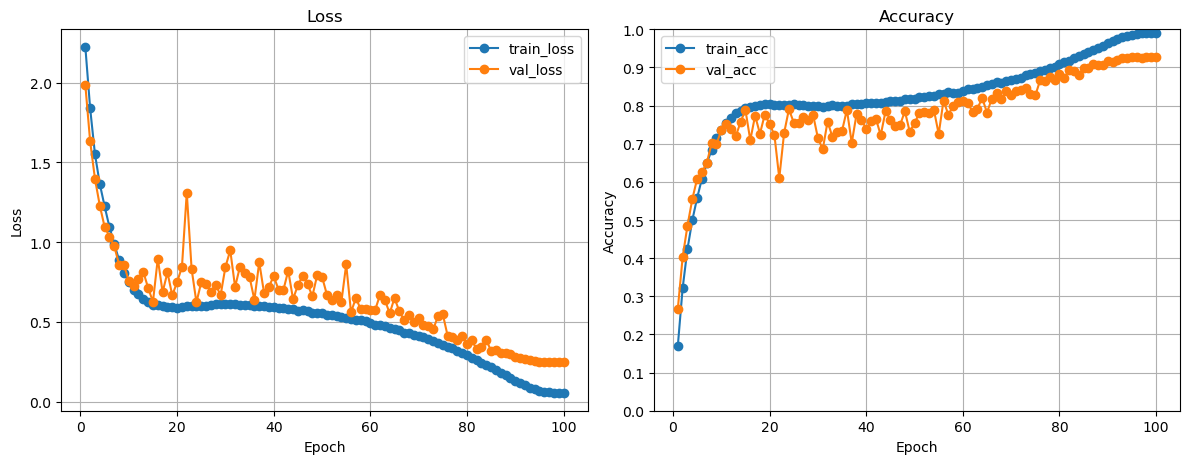

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_grad_gauss_med.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.01, 'noise_type': 'gradient', 'noise_magnitude': 0.05, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'test_phase': False}
File: adrien/resnet18_gradient_gaussian_0.05_20250515_115738/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.05
  Final Train Accuracy: 0.7600
  Final Val Accuracy:   0.7560



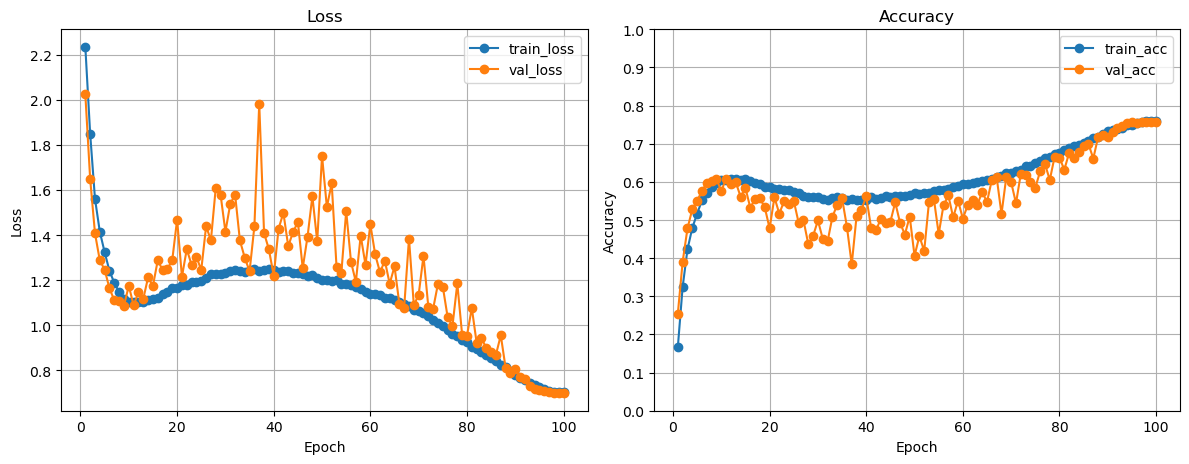

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_grad_gauss_low.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.01, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'test_phase': False}
File: adrien/resnet18_gradient_gaussian_0.01_20250515_101522/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9454
  Final Val Accuracy:   0.9051



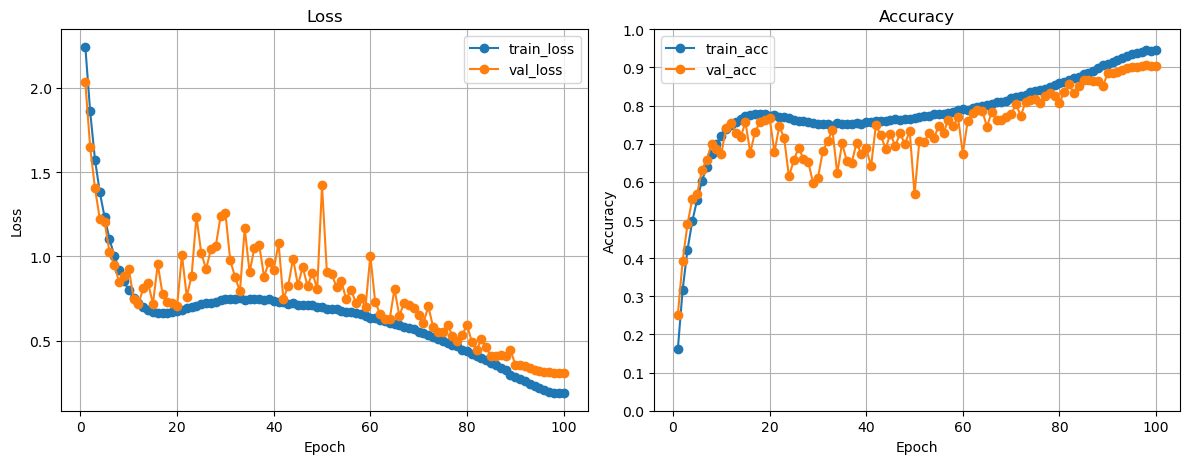

In [7]:
#Adrien
log_dir = "adrien"
plot_all_json(get_all_json(log_dir))

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_grad_gauss_med.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.01, 'noise_type': 'gradient', 'noise_magnitude': 0.05, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.1, 'test_phase': False}
File: 01Test/checkpoints01/metrics/resnet18_gradient_gaussian_0.05_20250516_020339/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.05
  Final Train Accuracy: 0.5751
  Final Val Accuracy:   0.5470



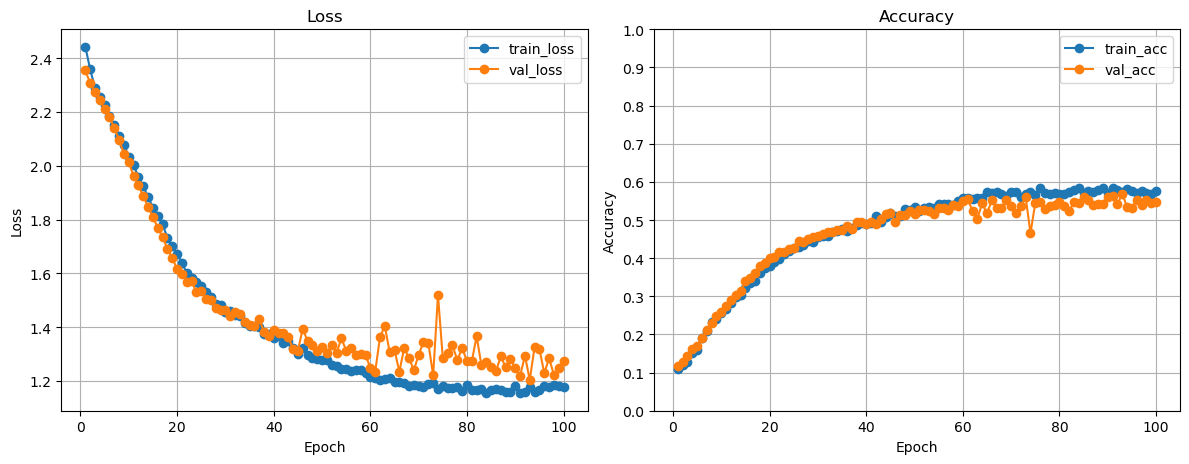

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_grad_gauss_low.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.01, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.1, 'test_phase': False}
File: 01Test/checkpoints01/metrics/resnet18_gradient_gaussian_0.01_20250516_020003/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.8375
  Final Val Accuracy:   0.6120



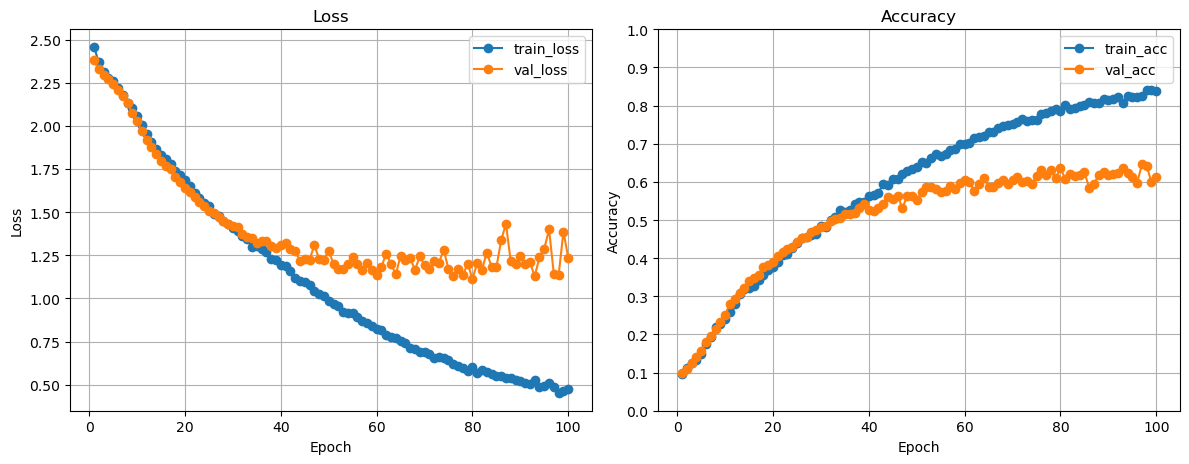

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_grad_uniform.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.01, 'noise_type': 'gradient', 'noise_magnitude': 0.03, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'uniform', 'subset': 0.1, 'test_phase': False}
File: 01Test/checkpoints01/metrics/resnet18_gradient_uniform_0.03_20250516_020714/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : uniform
  noise magnitude : 0.03
  Final Train Accuracy: 0.6911
  Final Val Accuracy:   0.5879



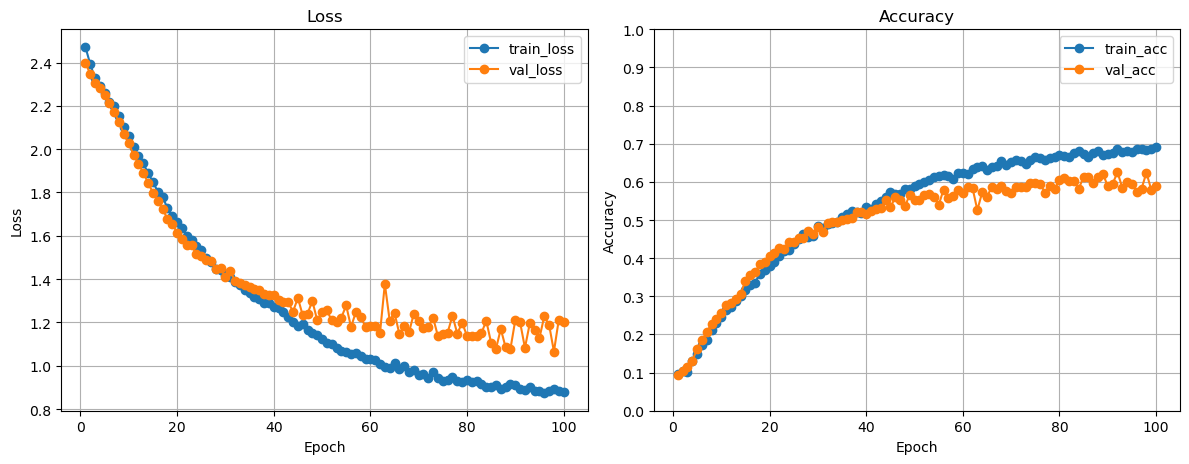

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_baseline.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.01, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.1, 'test_phase': False}
File: 01Test/checkpoints01/metrics/resnet18_none_20250516_015712/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.8894
  Final Val Accuracy:   0.6330



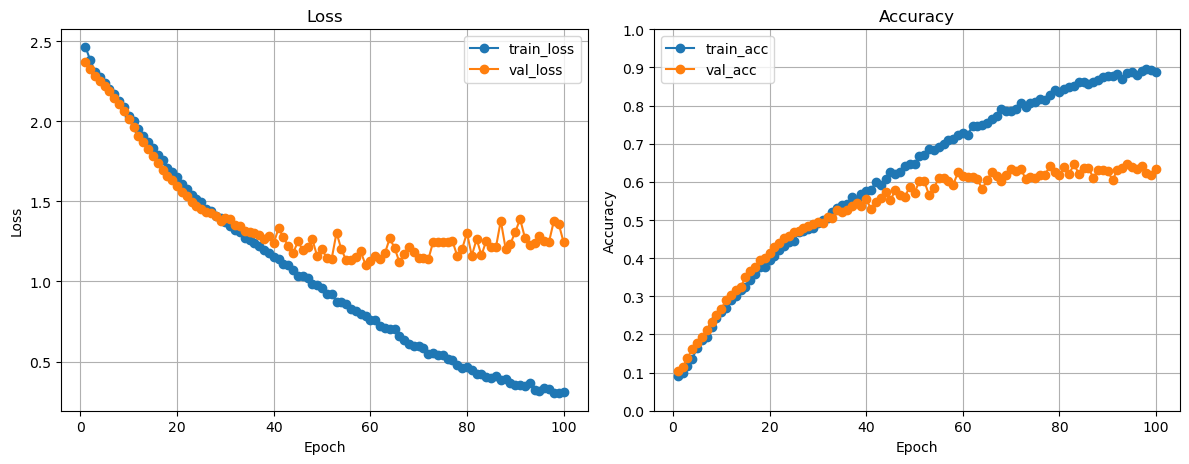

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_weight_gauss_low.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.01, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.1, 'test_phase': False}
File: 01Test/checkpoints01/metrics/resnet18_weight_gaussian_0.01_20250516_021042/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.2198
  Final Val Accuracy:   0.2293



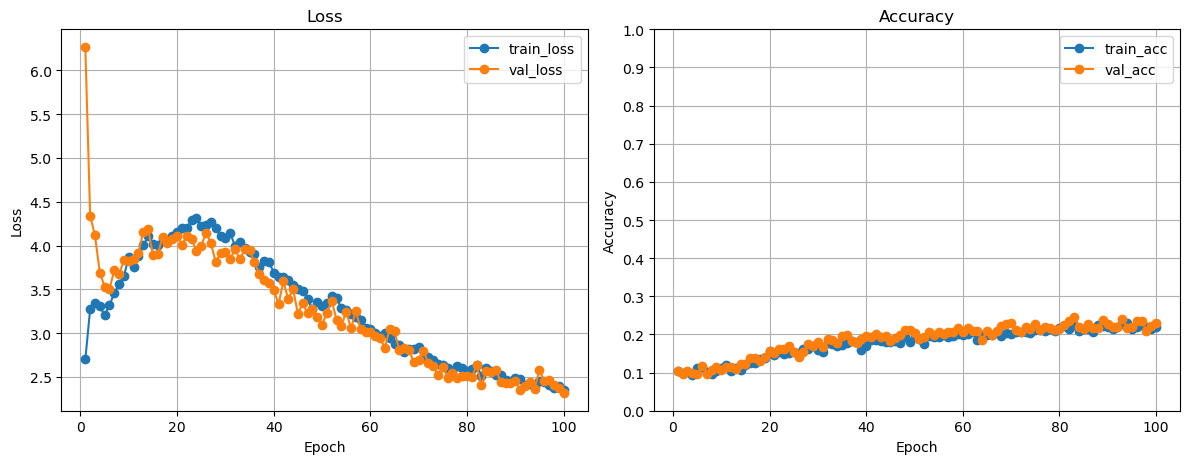

In [8]:
#10% dataset
log_dir = "01Test/checkpoints01/metrics"
plot_all_json(get_all_json(log_dir))

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_grad_uniform.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.01, 'noise_type': 'gradient', 'noise_magnitude': 0.03, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'uniform', 'subset': 1.0, 'test_phase': False}
File: 1Test/checkpoints1/metrics/resnet18_gradient_uniform_0.03_20250516_032952/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : uniform
  noise magnitude : 0.03
  Final Train Accuracy: 0.8059
  Final Val Accuracy:   0.8026



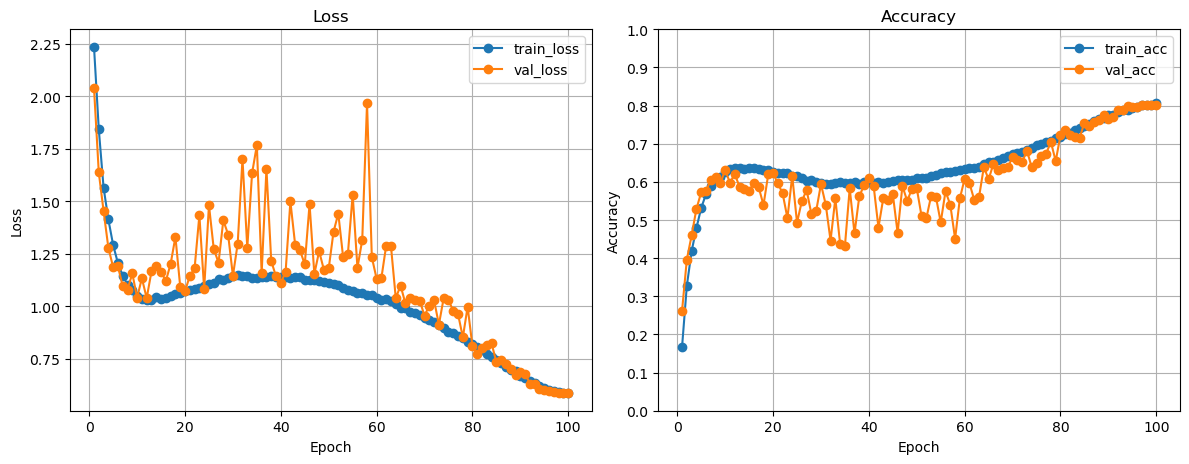

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_grad_gauss_low.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.01, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'test_phase': False}
File: 1Test/checkpoints1/metrics/resnet18_gradient_gaussian_0.01_20250516_023955/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9158
  Final Val Accuracy:   0.8852



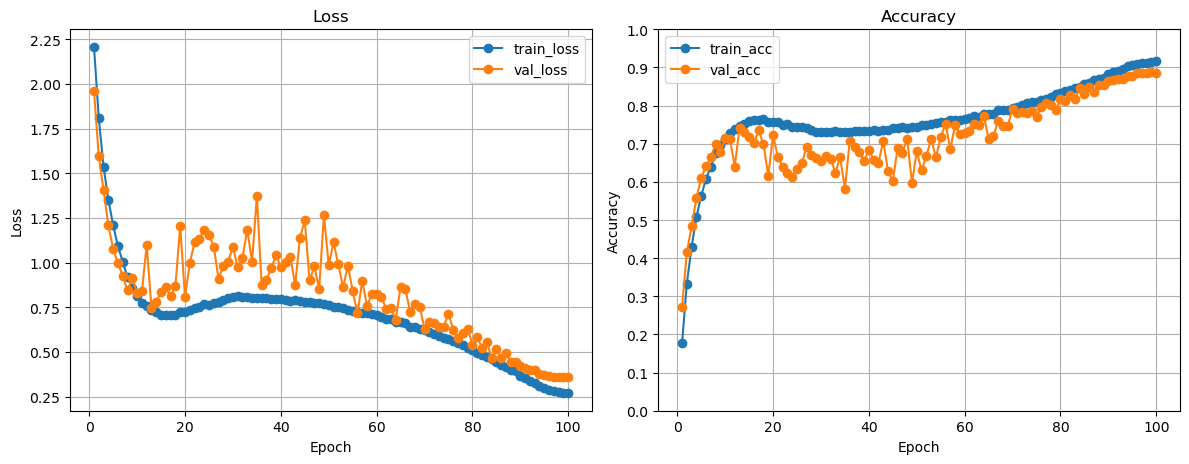

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_baseline.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.01, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'test_phase': False}
File: 1Test/checkpoints1/metrics/resnet18_none_20250516_022602/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.9902
  Final Val Accuracy:   0.9285



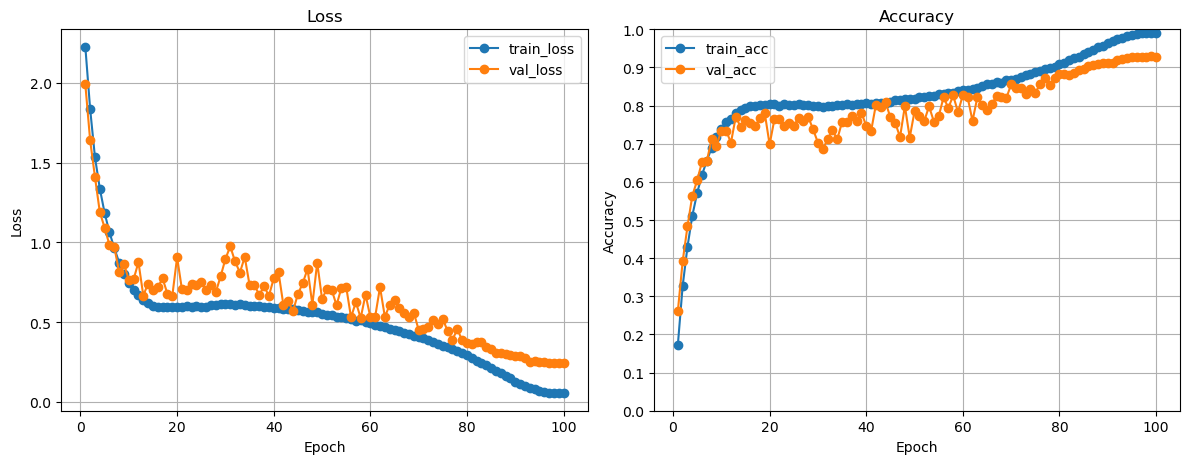

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_grad_gauss_med.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.01, 'noise_type': 'gradient', 'noise_magnitude': 0.05, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'test_phase': False}
File: 1Test/checkpoints1/metrics/resnet18_gradient_gaussian_0.05_20250516_030456/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.05
  Final Train Accuracy: 0.6937
  Final Val Accuracy:   0.6950



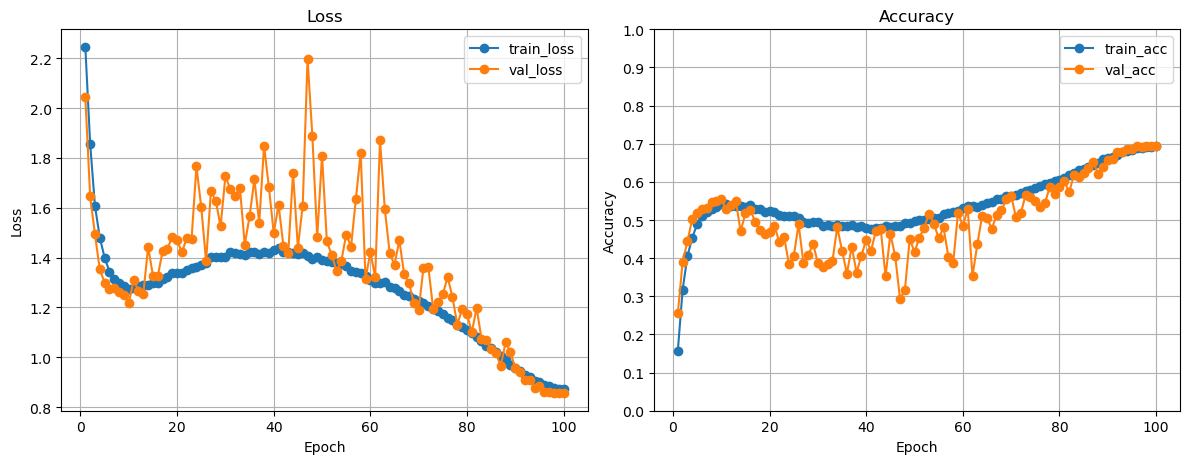

In [9]:
#100% dataset
log_dir = "1Test/checkpoints1/metrics"
plot_all_json(get_all_json(log_dir))

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_baseline.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.01, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.5, 'test_phase': False}
File: 05Test/metrics/resnet18_none_20250516_104122/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.8362
  Final Val Accuracy:   0.7961



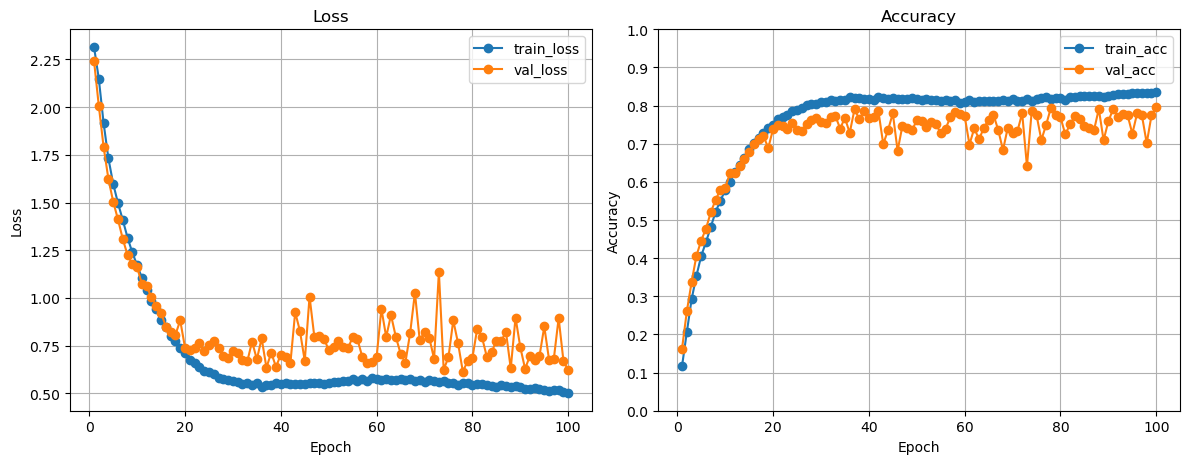

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_grad_gauss_low.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.01, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.5, 'test_phase': False}
File: 05Test/metrics/resnet18_gradient_gaussian_0.01_20250516_104853/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.7527
  Final Val Accuracy:   0.6645



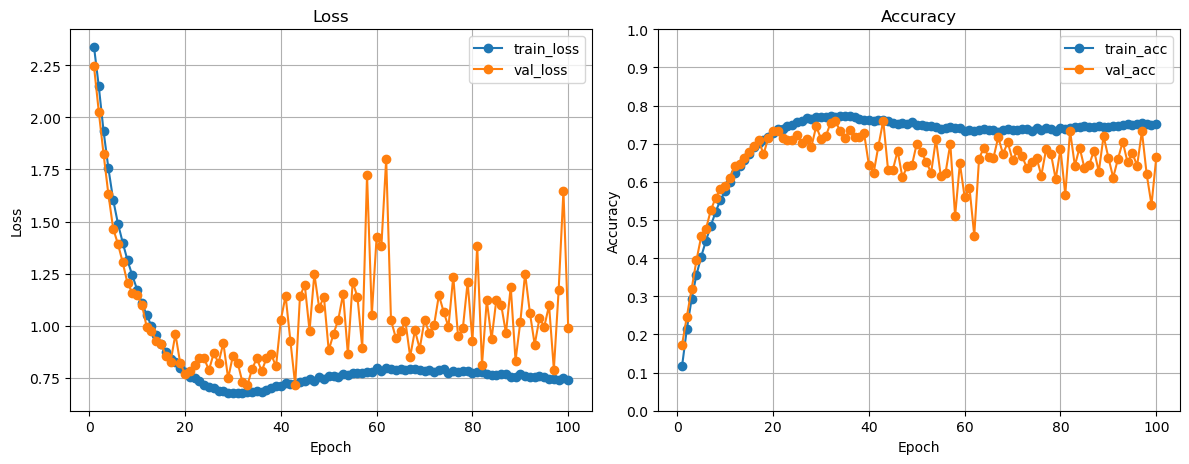

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_grad_uniform.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.01, 'noise_type': 'gradient', 'noise_magnitude': 0.03, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'uniform', 'subset': 0.5, 'test_phase': False}
File: 05Test/metrics/resnet18_gradient_uniform_0.03_20250516_111358/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : uniform
  noise magnitude : 0.03
  Final Train Accuracy: 0.6080
  Final Val Accuracy:   0.5416



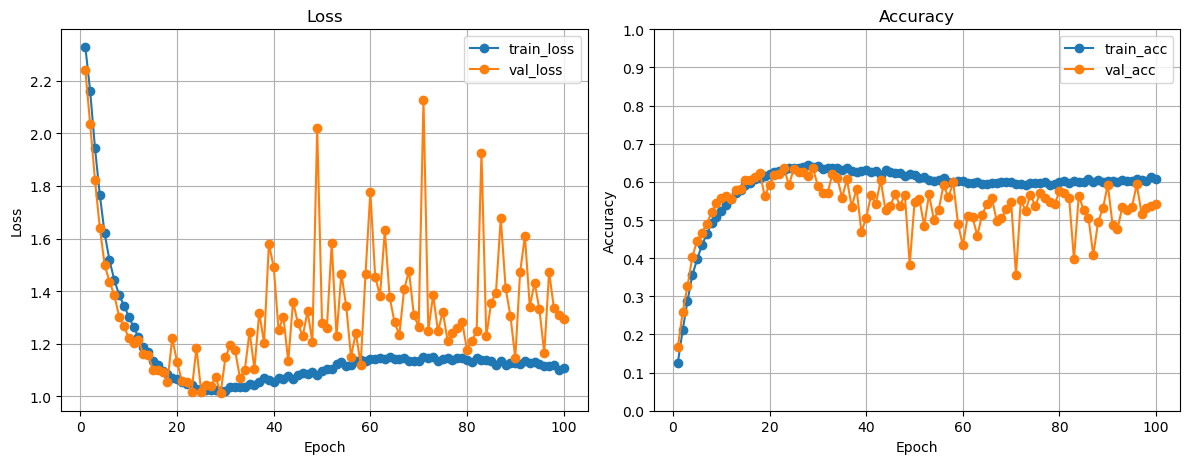

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_grad_gauss_med.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.01, 'noise_type': 'gradient', 'noise_magnitude': 0.05, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.5, 'test_phase': False}
File: 05Test/metrics/resnet18_gradient_gaussian_0.05_20250516_110130/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.05
  Final Train Accuracy: 0.4914
  Final Val Accuracy:   0.4206



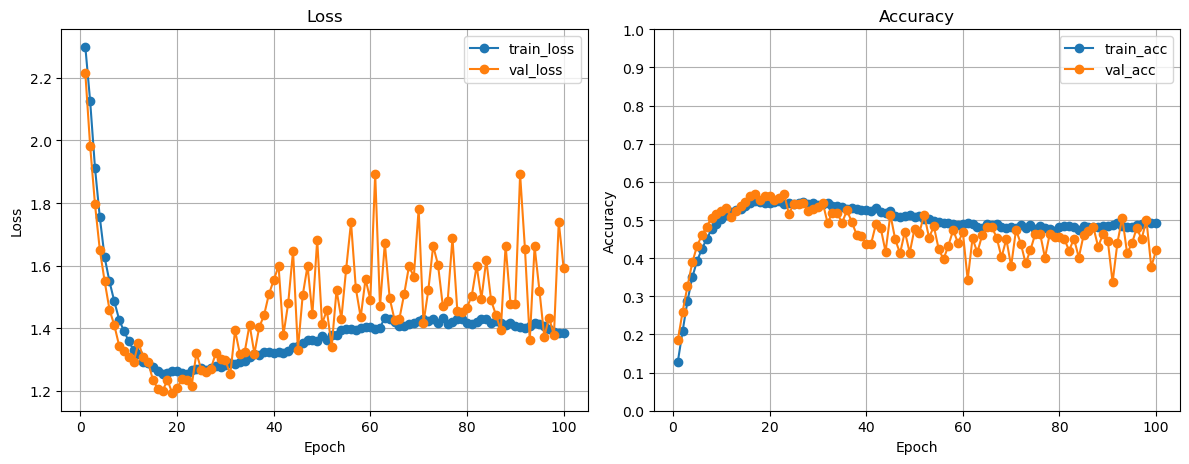

In [10]:
# 50%dataset
log_dir = "05Test/metrics"
plot_all_json(get_all_json(log_dir))

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_weight_0.1_0.5.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.1, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.5, 'test_phase': False}
File: simpleCnnTests/metrics/resnet18_weight_gaussian_0.1_20250519_054215/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.1
  Final Train Accuracy: 0.1221
  Final Val Accuracy:   0.1390



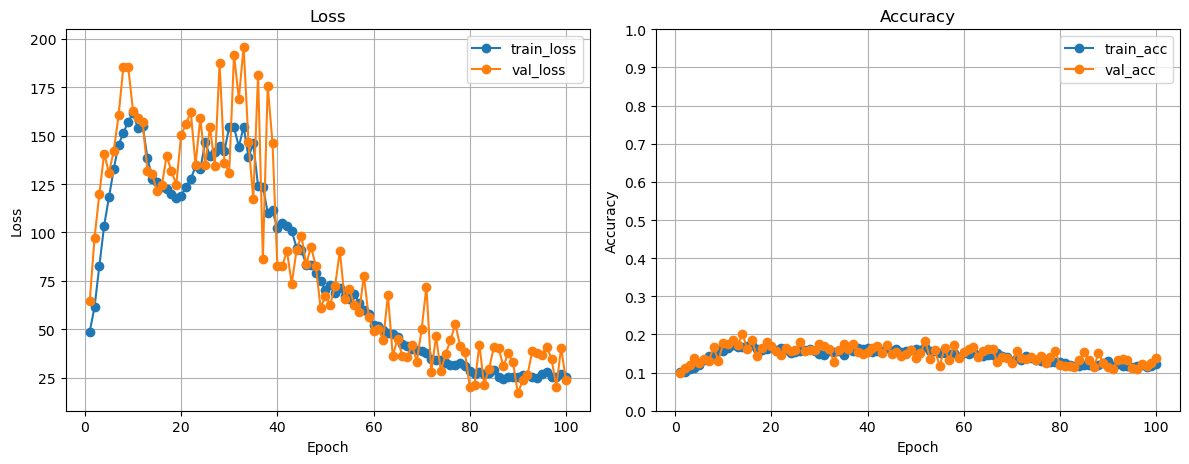

{'data_dir': './data/cifar10', 'checkpoint_name': 'simple_cnn_1.0_baseline.pth', 'download_weights': 0, 'classifier': 'simple_cnn', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'test_phase': False}
File: simpleCnnTests/metrics/simple_cnn_none_20250519_010508/all_metrics.json
  model : simple
  noise position : cnn
  noise type : none
  noise magnitude : 20250519
  Final Train Accuracy: 0.9980
  Final Val Accuracy:   0.8951



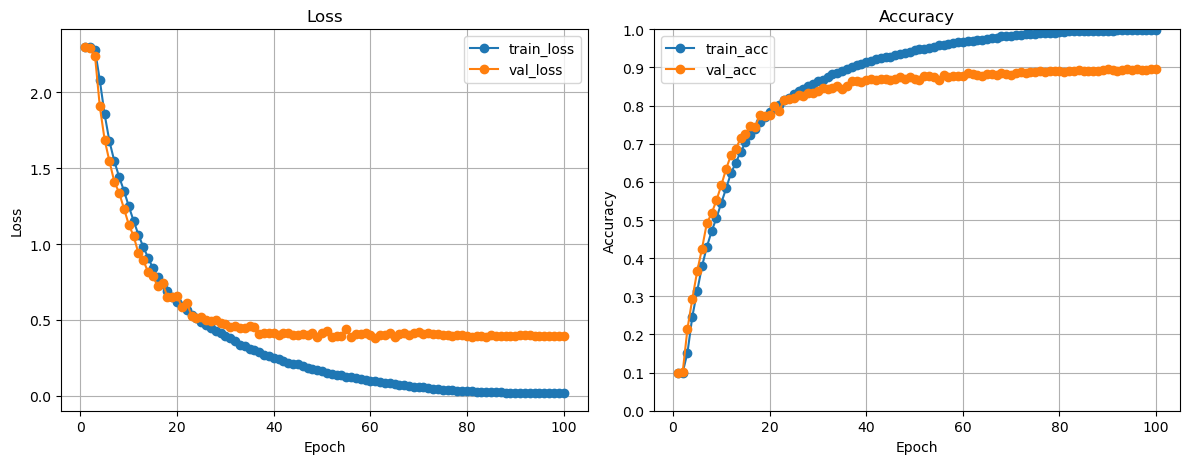

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_weight_0.01_0.5.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.5, 'test_phase': False}
File: simpleCnnTests/metrics/resnet18_weight_gaussian_0.01_20250519_034836/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.3420
  Final Val Accuracy:   0.3309



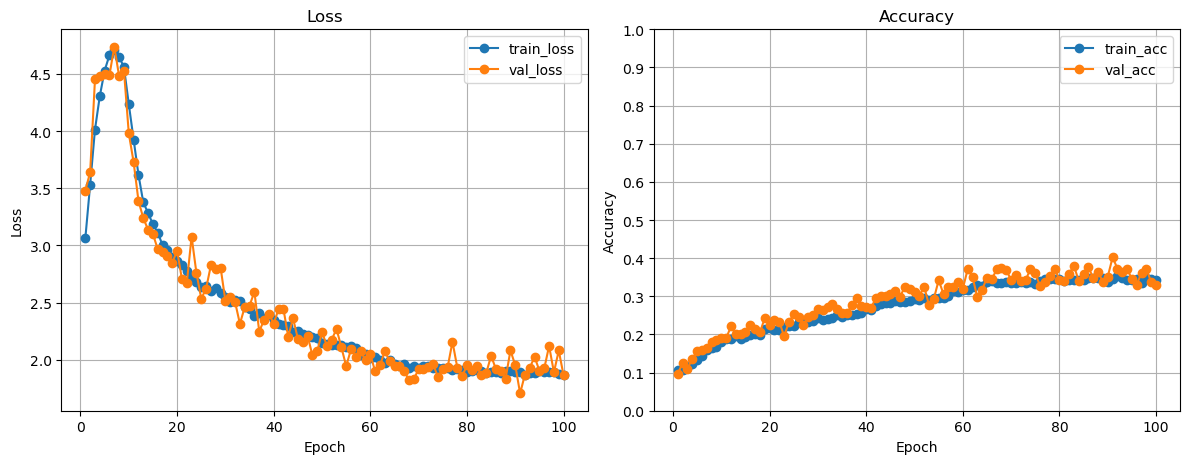

{'data_dir': './data/cifar10', 'checkpoint_name': 'simple_cnn_input_0.05_0.5.pth', 'download_weights': 0, 'classifier': 'simple_cnn', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'input', 'noise_magnitude': 0.05, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.5, 'test_phase': False}
File: simpleCnnTests/metrics/simple_cnn_input_gaussian_0.05_20250519_020651/all_metrics.json
  model : simple
  noise position : cnn
  noise type : input
  noise magnitude : gaussian
  Final Train Accuracy: 0.9790
  Final Val Accuracy:   0.8331



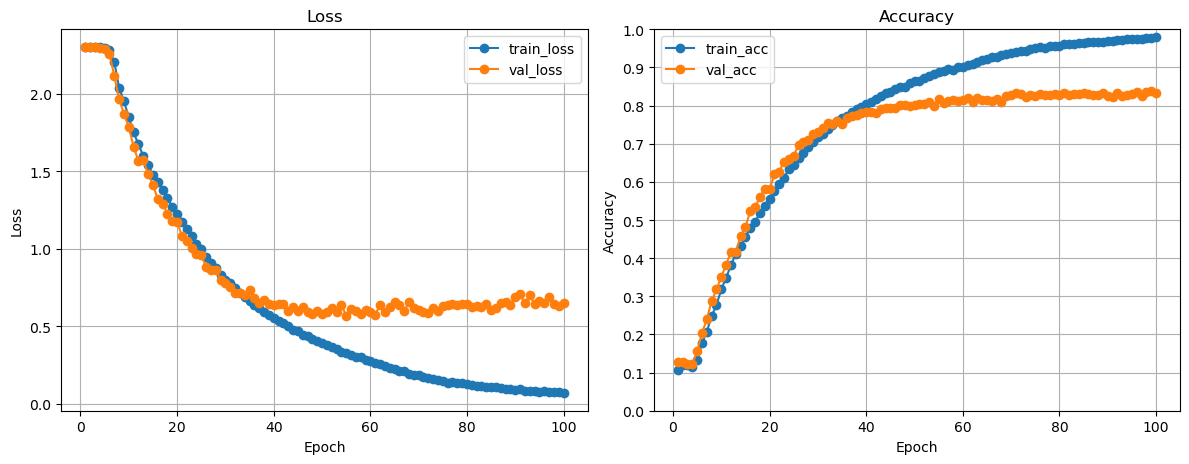

{'data_dir': './data/cifar10', 'checkpoint_name': 'simple_cnn_0.5_baseline.pth', 'download_weights': 0, 'classifier': 'simple_cnn', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.5, 'test_phase': False}
File: simpleCnnTests/metrics/simple_cnn_none_20250519_000522/all_metrics.json
  model : simple
  noise position : cnn
  noise type : none
  noise magnitude : 20250519
  Final Train Accuracy: 0.9799
  Final Val Accuracy:   0.8404



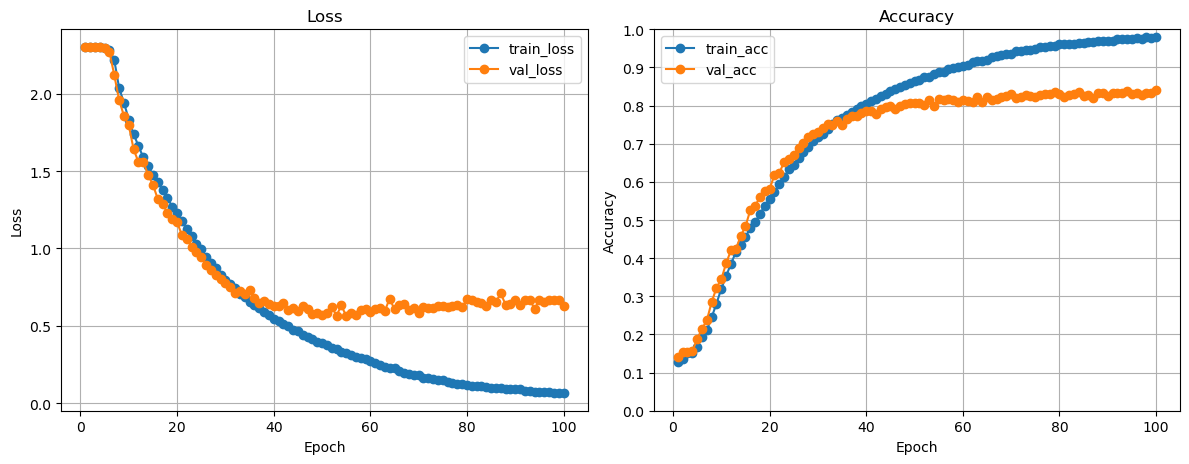

{'data_dir': './data/cifar10', 'checkpoint_name': 'simple_cnn_input_0.05_0.1.pth', 'download_weights': 0, 'classifier': 'simple_cnn', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'input', 'noise_magnitude': 0.05, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.1, 'test_phase': False}
File: simpleCnnTests/metrics/simple_cnn_input_gaussian_0.05_20250519_014634/all_metrics.json
  model : simple
  noise position : cnn
  noise type : input
  noise magnitude : gaussian
  Final Train Accuracy: 0.6052
  Final Val Accuracy:   0.5875



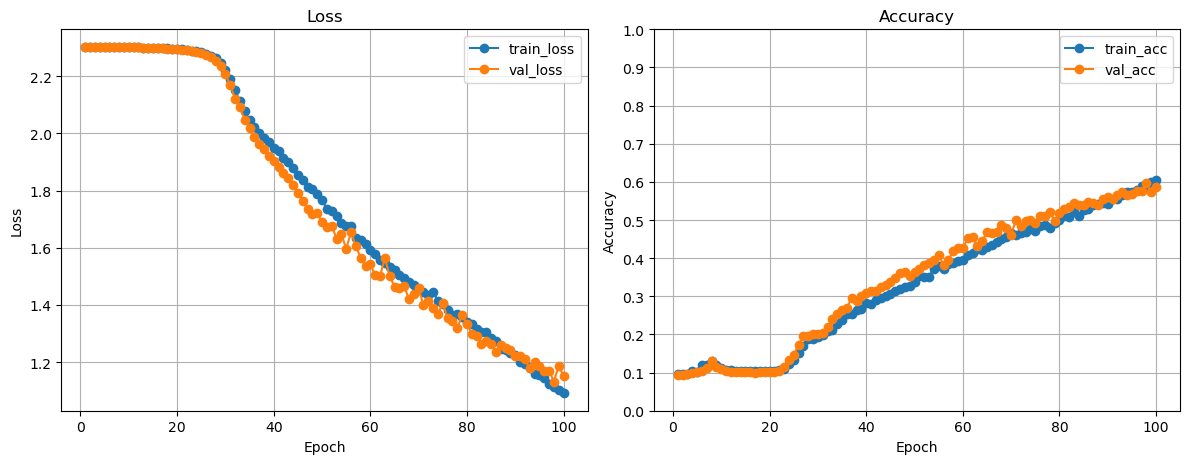

{'data_dir': './data/cifar10', 'checkpoint_name': 'simple_cnn_0.5_baseline.pth', 'download_weights': 0, 'classifier': 'simple_cnn', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.5, 'test_phase': False}
File: simpleCnnTests/metrics/simple_cnn_none_20250519_004328/all_metrics.json
  model : simple
  noise position : cnn
  noise type : none
  noise magnitude : 20250519
  Final Train Accuracy: 0.9796
  Final Val Accuracy:   0.8432



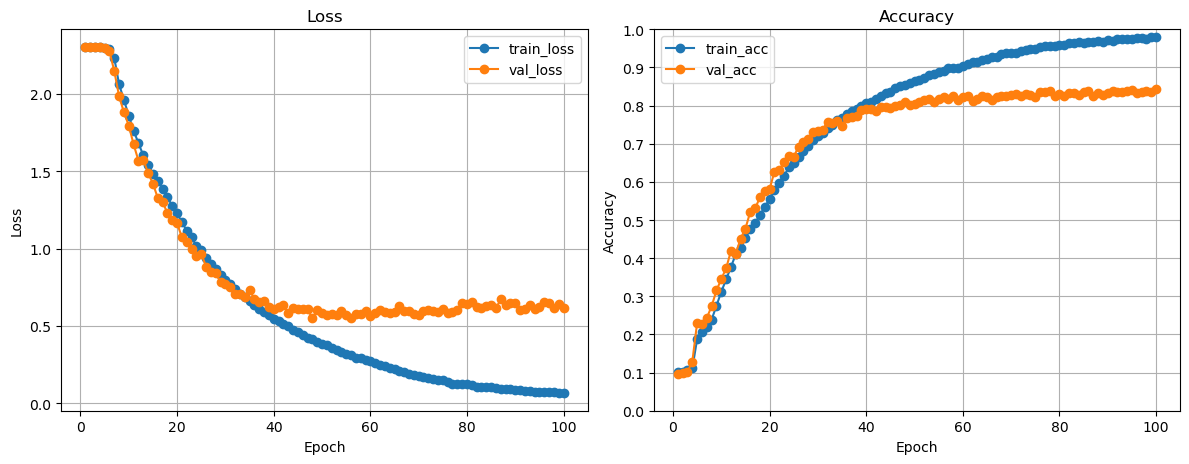

{'data_dir': './data/cifar10', 'checkpoint_name': 'simple_cnn_gradient_0.01_0.5.pth', 'download_weights': 0, 'classifier': 'simple_cnn', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.5, 'test_phase': False}
File: simpleCnnTests/metrics/simple_cnn_gradient_gaussian_0.01_20250519_005101/all_metrics.json
  model : simple
  noise position : cnn
  noise type : gradient
  noise magnitude : gaussian
  Final Train Accuracy: 0.7425
  Final Val Accuracy:   0.7438



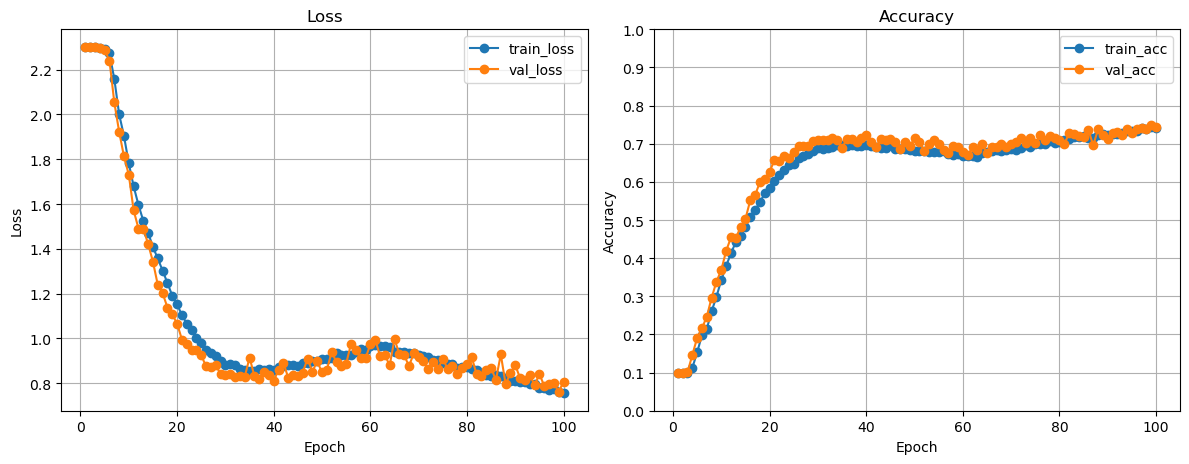

{'data_dir': './data/cifar10', 'checkpoint_name': 'simple_cnn_input_0.01_0.5.pth', 'download_weights': 0, 'classifier': 'simple_cnn', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'input', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.5, 'test_phase': False}
File: simpleCnnTests/metrics/simple_cnn_input_gaussian_0.01_20250519_015916/all_metrics.json
  model : simple
  noise position : cnn
  noise type : input
  noise magnitude : gaussian
  Final Train Accuracy: 0.9819
  Final Val Accuracy:   0.8405



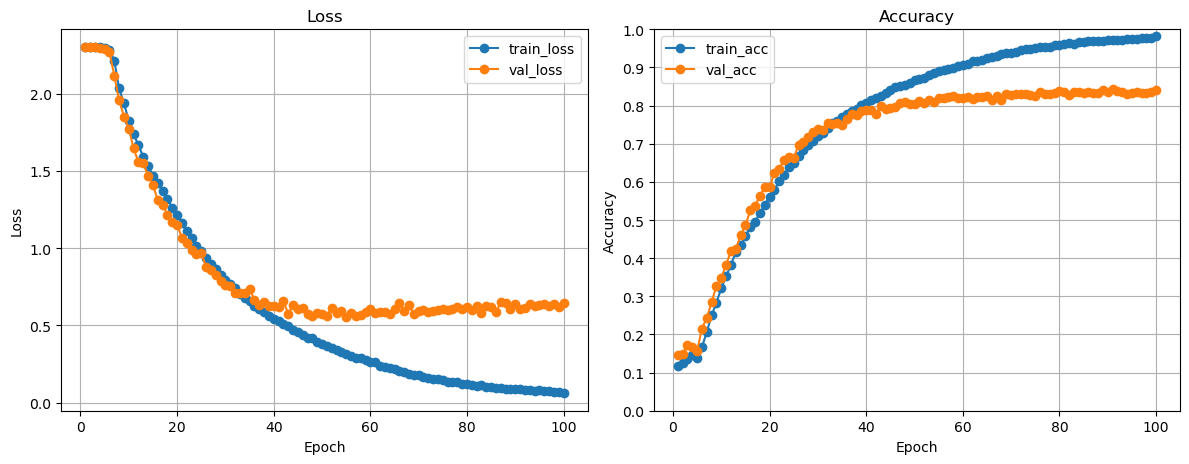

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_baseline.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'test_phase': False}
File: simpleCnnTests/metrics/resnet18_none_20250519_063853/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.9991
  Final Val Accuracy:   0.9194



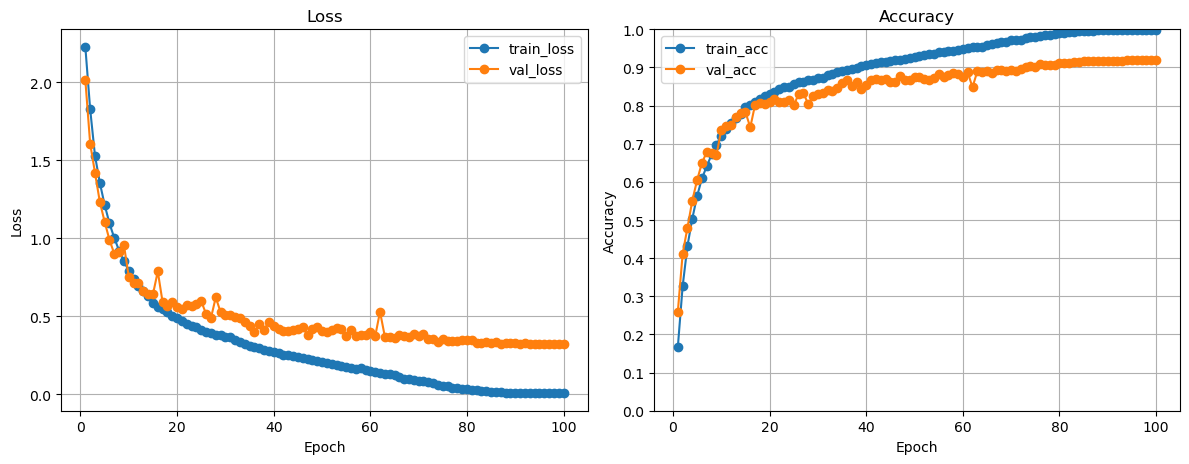

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_weight_0.05_0.5.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.05, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.5, 'test_phase': False}
File: simpleCnnTests/metrics/resnet18_weight_gaussian_0.05_20250519_044533/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.05
  Final Train Accuracy: 0.1296
  Final Val Accuracy:   0.1393



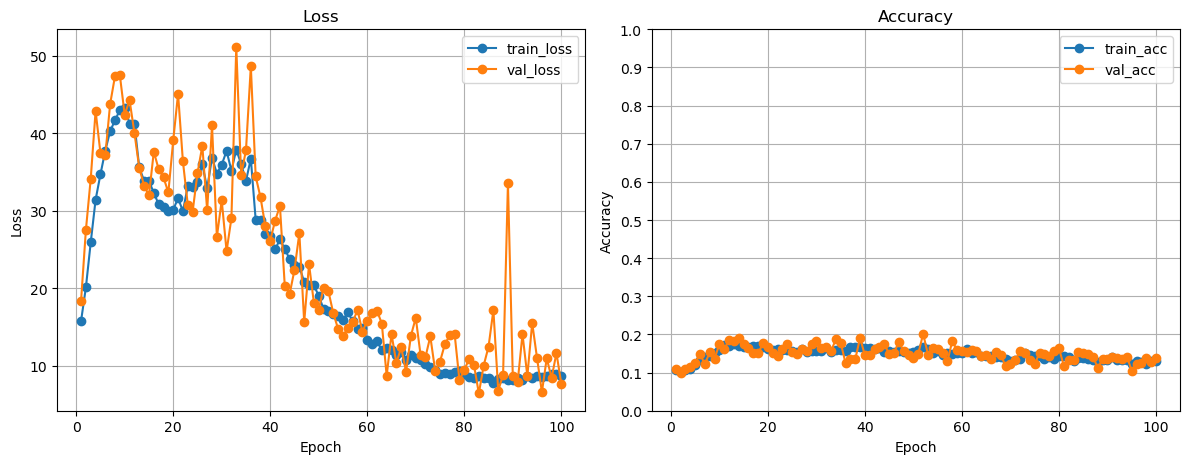

{'data_dir': './data/cifar10', 'checkpoint_name': 'simple_cnn_gradient_0.01_0.1.pth', 'download_weights': 0, 'classifier': 'simple_cnn', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.1, 'test_phase': False}
File: simpleCnnTests/metrics/simple_cnn_gradient_gaussian_0.01_20250519_003518/all_metrics.json
  model : simple
  noise position : cnn
  noise type : gradient
  noise magnitude : gaussian
  Final Train Accuracy: 0.6412
  Final Val Accuracy:   0.6055



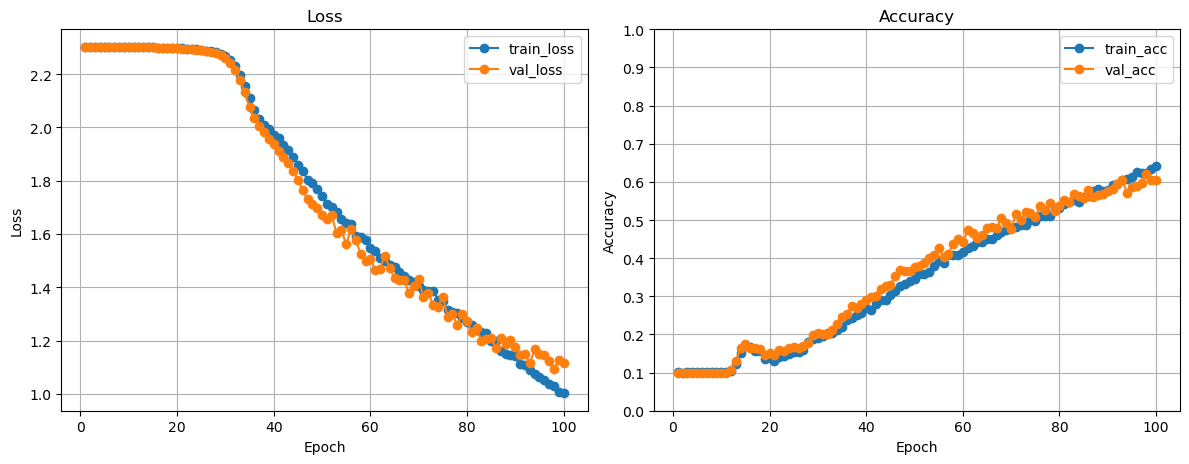

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.1_baseline.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.1, 'test_phase': False}
File: simpleCnnTests/metrics/resnet18_none_20250519_031753/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.9117
  Final Val Accuracy:   0.6231



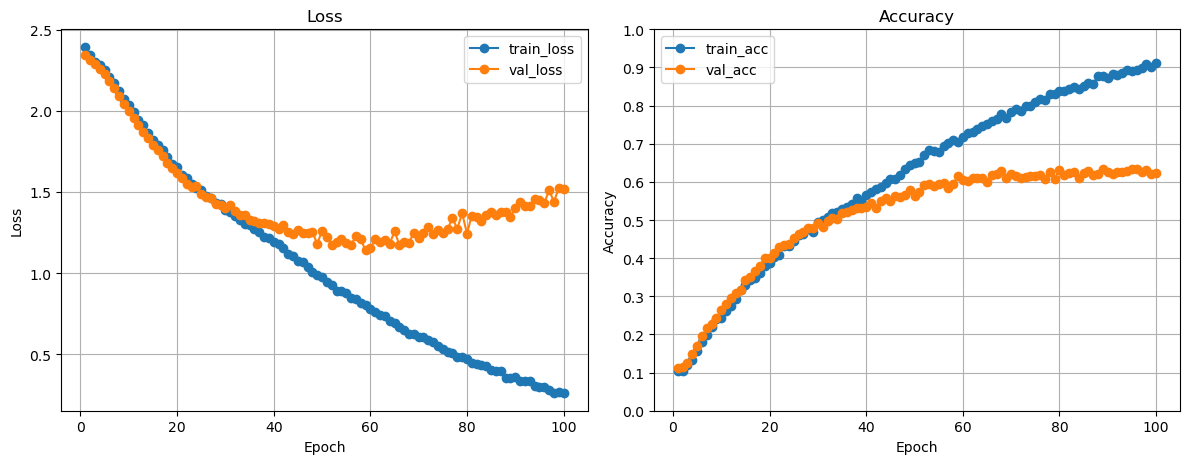

{'data_dir': './data/cifar10', 'checkpoint_name': 'simple_cnn_0.1_baseline.pth', 'download_weights': 0, 'classifier': 'simple_cnn', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.1, 'test_phase': False}
File: simpleCnnTests/metrics/simple_cnn_none_20250519_003244/all_metrics.json
  model : simple
  noise position : cnn
  noise type : none
  noise magnitude : 20250519
  Final Train Accuracy: 0.5984
  Final Val Accuracy:   0.5784



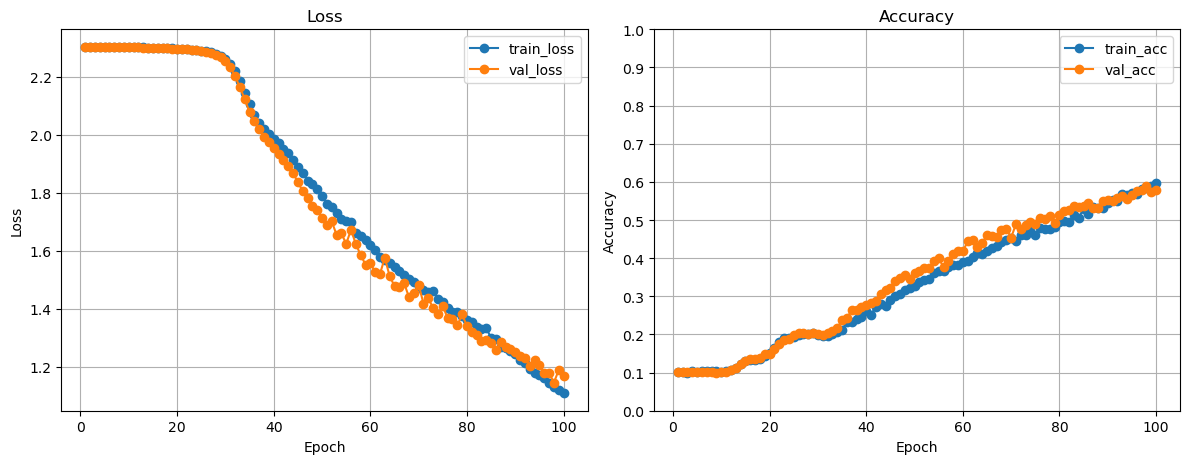

{'data_dir': './data/cifar10', 'checkpoint_name': 'simple_cnn_input_0.1_0.1.pth', 'download_weights': 0, 'classifier': 'simple_cnn', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'input', 'noise_magnitude': 0.1, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.1, 'test_phase': False}
File: simpleCnnTests/metrics/simple_cnn_input_gaussian_0.1_20250519_014908/all_metrics.json
  model : simple
  noise position : cnn
  noise type : input
  noise magnitude : gaussian
  Final Train Accuracy: 0.5970
  Final Val Accuracy:   0.5718



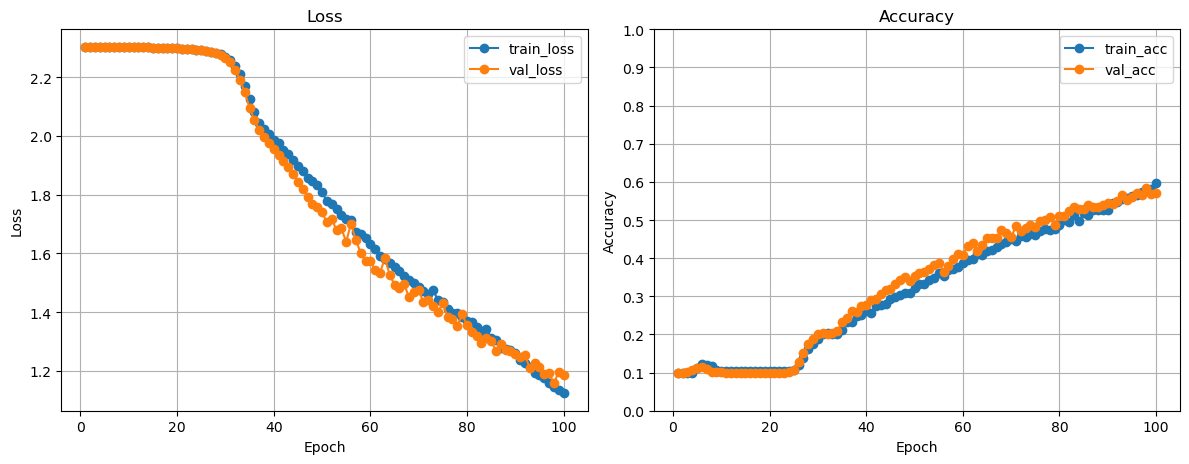

{'data_dir': './data/cifar10', 'checkpoint_name': 'simple_cnn_1.0_baseline.pth', 'download_weights': 0, 'classifier': 'simple_cnn', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'test_phase': False}
File: simpleCnnTests/metrics/simple_cnn_none_20250519_001549/all_metrics.json
  model : simple
  noise position : cnn
  noise type : none
  noise magnitude : 20250519
  Final Train Accuracy: 0.9978
  Final Val Accuracy:   0.8979



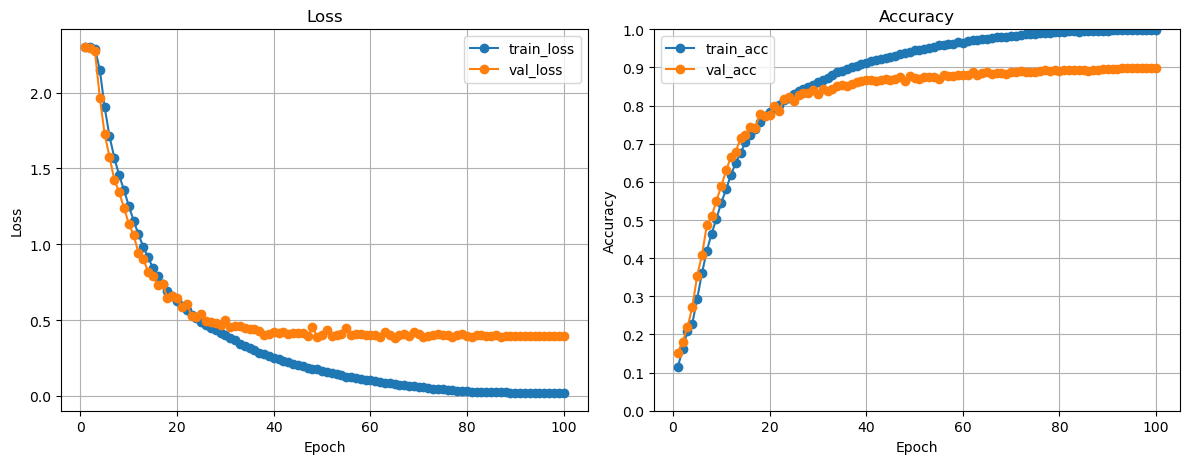

{'data_dir': './data/cifar10', 'checkpoint_name': 'simple_cnn_0.1_baseline.pth', 'download_weights': 0, 'classifier': 'simple_cnn', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.1, 'test_phase': False}
File: simpleCnnTests/metrics/simple_cnn_none_20250519_000002/all_metrics.json
  model : simple
  noise position : cnn
  noise type : none
  noise magnitude : 20250519
  Final Train Accuracy: 0.5976
  Final Val Accuracy:   0.5902



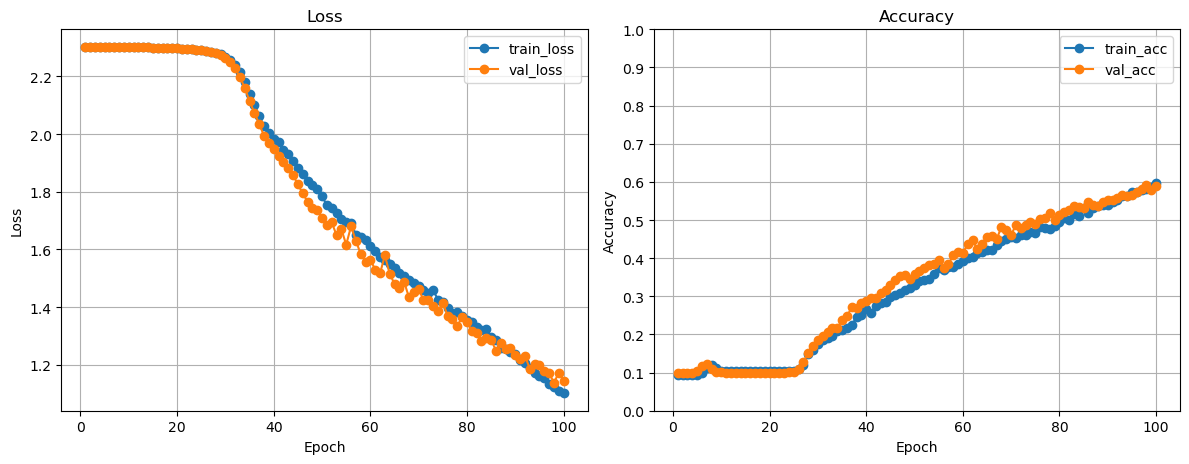

{'data_dir': './data/cifar10', 'checkpoint_name': 'simple_cnn_input_0.05_1.0.pth', 'download_weights': 0, 'classifier': 'simple_cnn', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'input', 'noise_magnitude': 0.05, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'test_phase': False}
File: simpleCnnTests/metrics/simple_cnn_input_gaussian_0.05_20250519_024958/all_metrics.json
  model : simple
  noise position : cnn
  noise type : input
  noise magnitude : gaussian
  Final Train Accuracy: 0.9978
  Final Val Accuracy:   0.8942



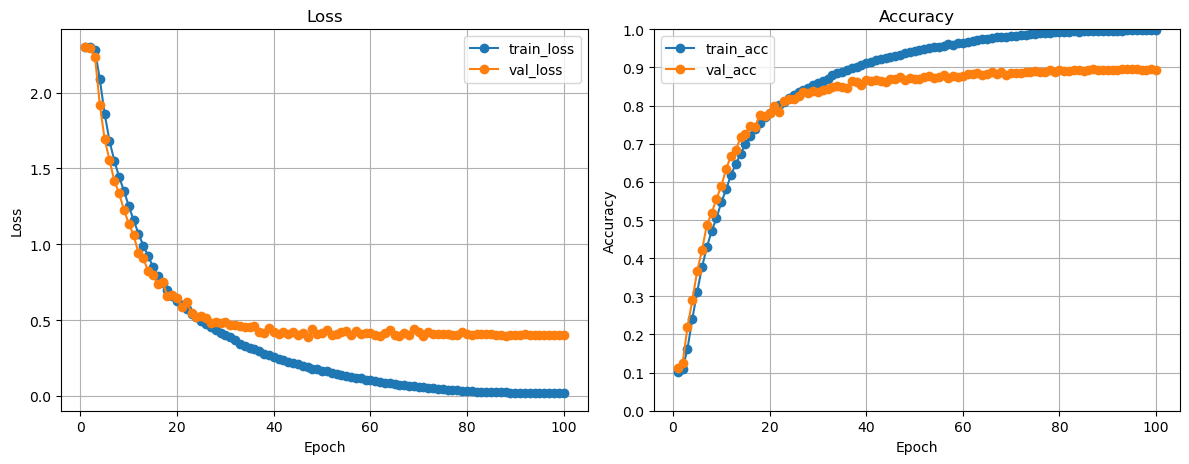

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_weight_0.01_0.1.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.1, 'test_phase': False}
File: simpleCnnTests/metrics/resnet18_weight_gaussian_0.01_20250519_032026/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.2274
  Final Val Accuracy:   0.2316



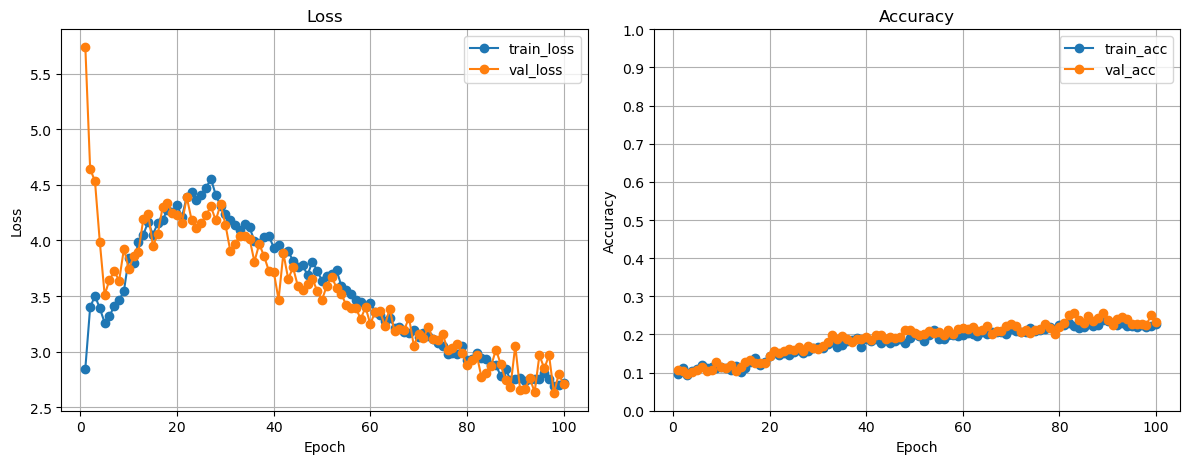

{'data_dir': './data/cifar10', 'checkpoint_name': 'simple_cnn_gradient_0.01_1.0.pth', 'download_weights': 0, 'classifier': 'simple_cnn', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'test_phase': False}
File: simpleCnnTests/metrics/simple_cnn_gradient_gaussian_0.01_20250519_011858/all_metrics.json
  model : simple
  noise position : cnn
  noise type : gradient
  noise magnitude : gaussian
  Final Train Accuracy: 0.8490
  Final Val Accuracy:   0.8330



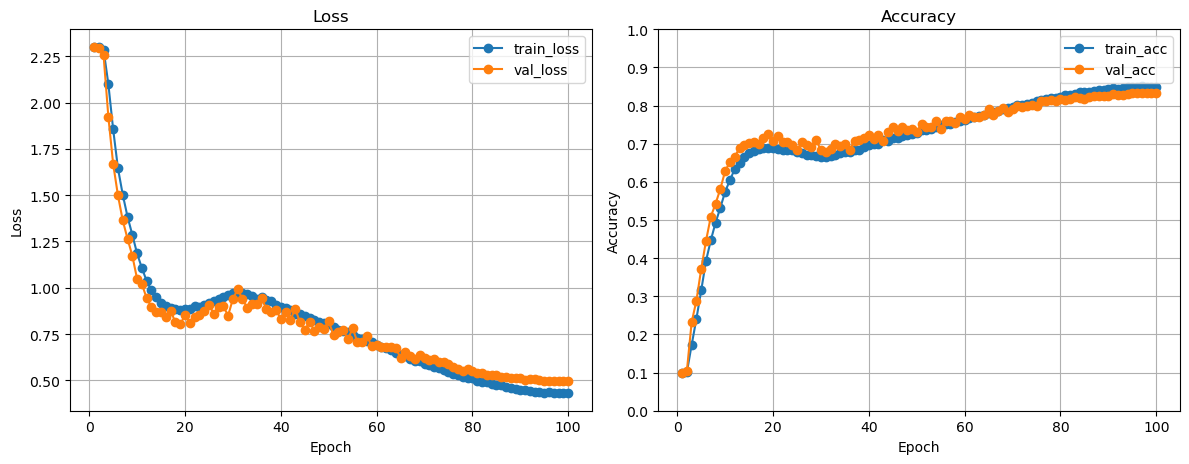

{'data_dir': './data/cifar10', 'checkpoint_name': 'simple_cnn_input_0.01_1.0.pth', 'download_weights': 0, 'classifier': 'simple_cnn', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'input', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'test_phase': False}
File: simpleCnnTests/metrics/simple_cnn_input_gaussian_0.01_20250519_023600/all_metrics.json
  model : simple
  noise position : cnn
  noise type : input
  noise magnitude : gaussian
  Final Train Accuracy: 0.9979
  Final Val Accuracy:   0.8924



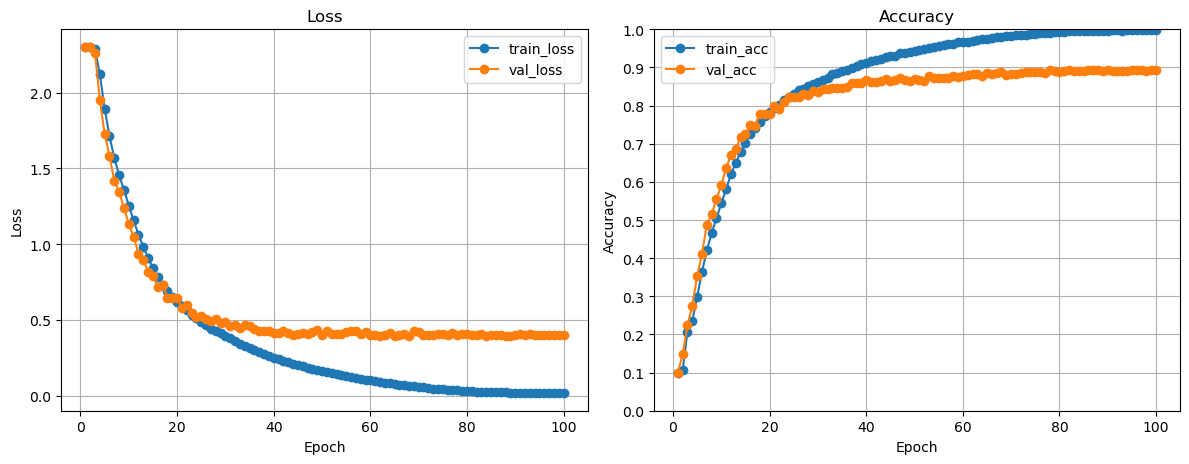

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.5_baseline.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.5, 'test_phase': False}
File: simpleCnnTests/metrics/resnet18_none_20250519_034115/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.9603
  Final Val Accuracy:   0.8457



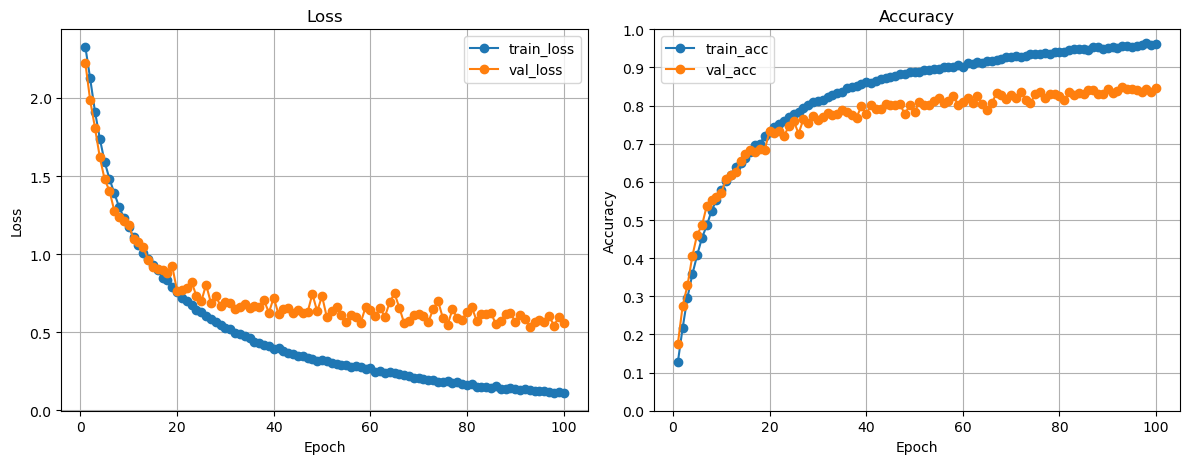

{'data_dir': './data/cifar10', 'checkpoint_name': 'simple_cnn_1.0_baseline.pth', 'download_weights': 0, 'classifier': 'simple_cnn', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'test_phase': False}
File: simpleCnnTests/metrics/simple_cnn_none_20250519_022209/all_metrics.json
  model : simple
  noise position : cnn
  noise type : none
  noise magnitude : 20250519
  Final Train Accuracy: 0.9978
  Final Val Accuracy:   0.8930



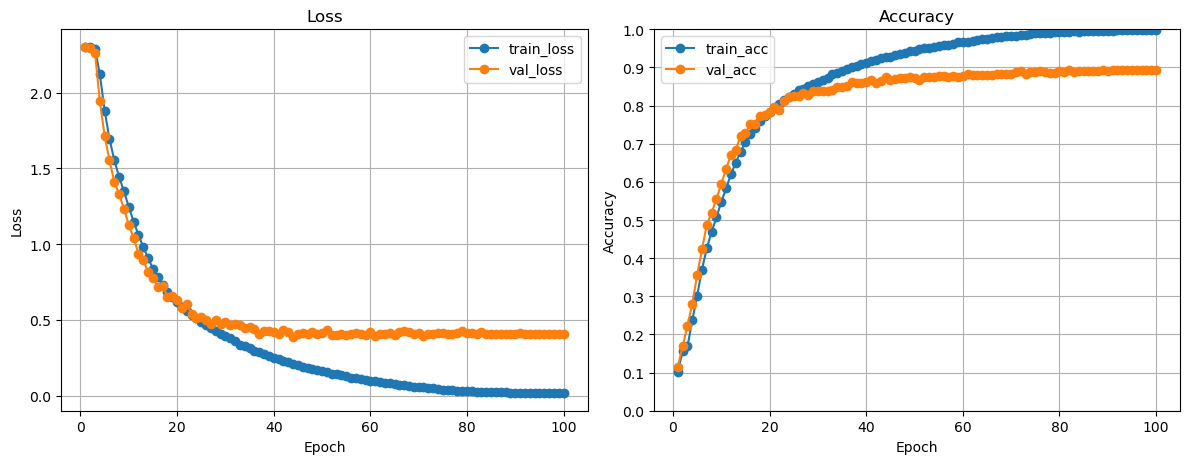

{'data_dir': './data/cifar10', 'checkpoint_name': 'simple_cnn_gradient_0.05_0.1.pth', 'download_weights': 0, 'classifier': 'simple_cnn', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'gradient', 'noise_magnitude': 0.05, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.1, 'test_phase': False}
File: simpleCnnTests/metrics/simple_cnn_gradient_gaussian_0.05_20250519_003810/all_metrics.json
  model : simple
  noise position : cnn
  noise type : gradient
  noise magnitude : gaussian
  Final Train Accuracy: 0.1380
  Final Val Accuracy:   0.1727



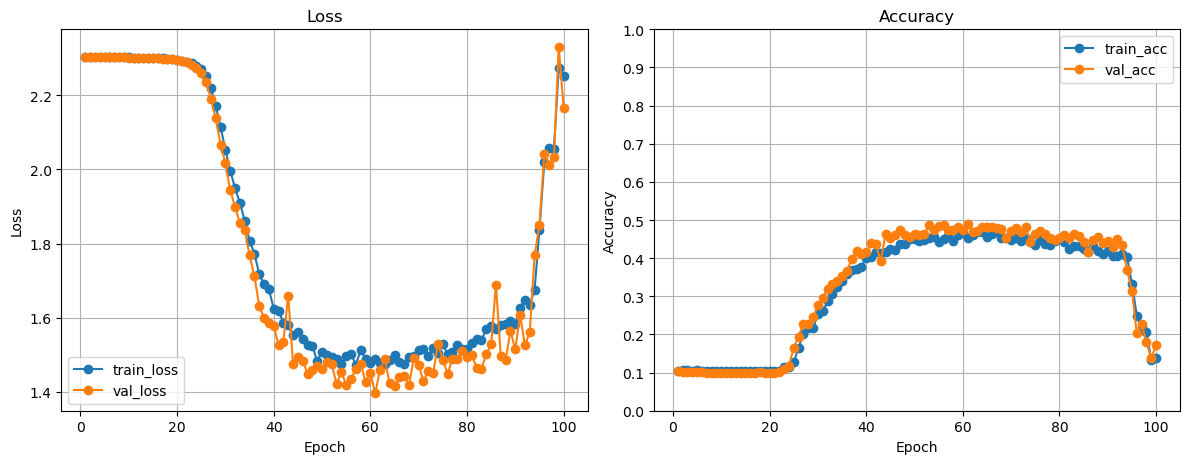

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_weight_0.05_0.1.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.05, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.1, 'test_phase': False}
File: simpleCnnTests/metrics/resnet18_weight_gaussian_0.05_20250519_032723/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.05
  Final Train Accuracy: 0.1755
  Final Val Accuracy:   0.2052



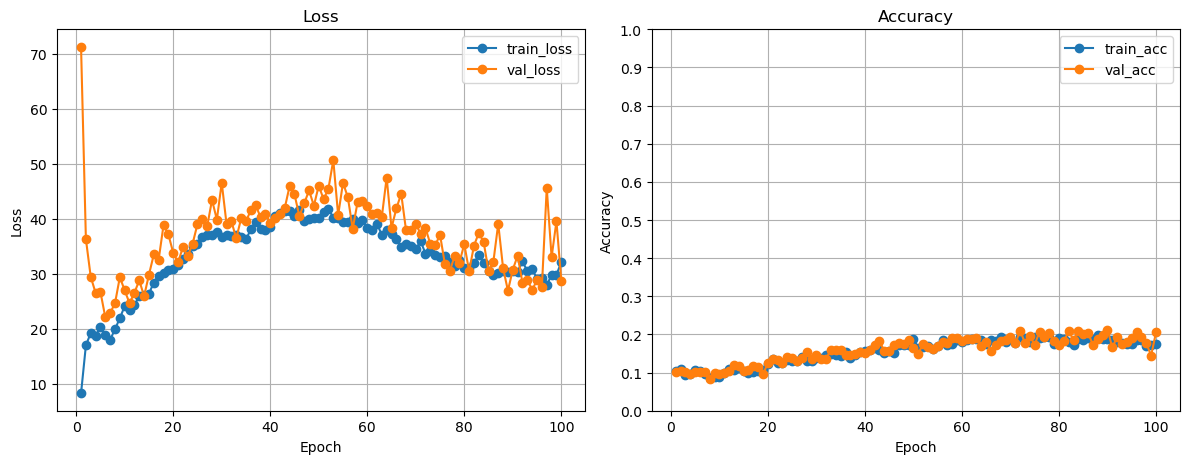

{'data_dir': './data/cifar10', 'checkpoint_name': 'simple_cnn_input_0.01_0.1.pth', 'download_weights': 0, 'classifier': 'simple_cnn', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'input', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.1, 'test_phase': False}
File: simpleCnnTests/metrics/simple_cnn_input_gaussian_0.01_20250519_014400/all_metrics.json
  model : simple
  noise position : cnn
  noise type : input
  noise magnitude : gaussian
  Final Train Accuracy: 0.5931
  Final Val Accuracy:   0.5690



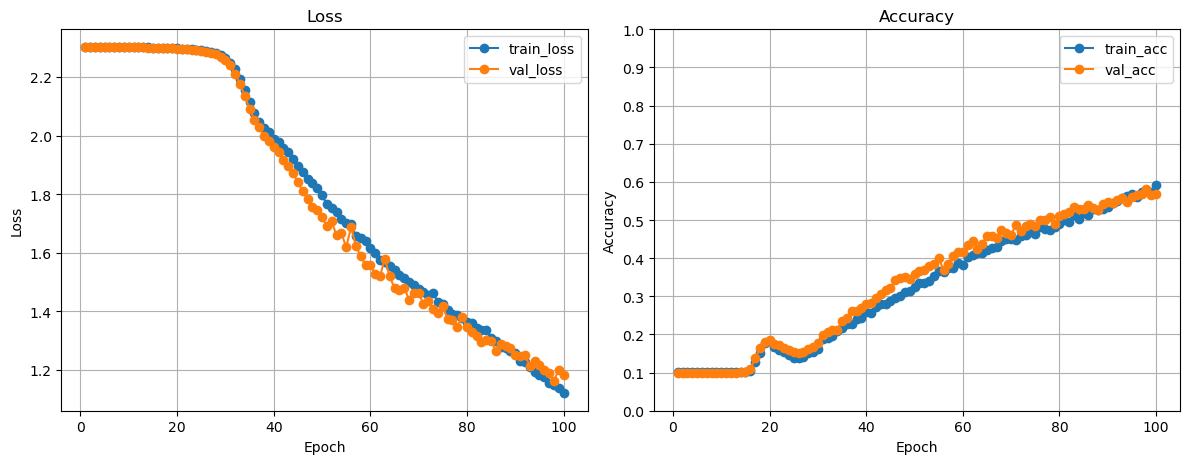

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_weight_0.1_0.1.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.1, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.1, 'test_phase': False}
File: simpleCnnTests/metrics/resnet18_weight_gaussian_0.1_20250519_033419/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.1
  Final Train Accuracy: 0.1707
  Final Val Accuracy:   0.1640



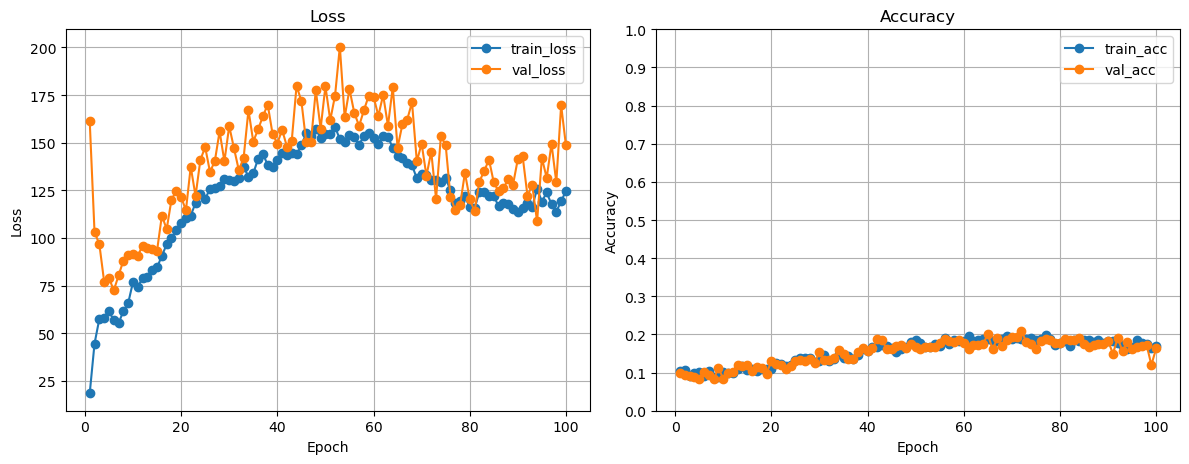

{'data_dir': './data/cifar10', 'checkpoint_name': 'simple_cnn_0.1_baseline.pth', 'download_weights': 0, 'classifier': 'simple_cnn', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.1, 'test_phase': False}
File: simpleCnnTests/metrics/simple_cnn_none_20250519_014127/all_metrics.json
  model : simple
  noise position : cnn
  noise type : none
  noise magnitude : 20250519
  Final Train Accuracy: 0.5923
  Final Val Accuracy:   0.5794



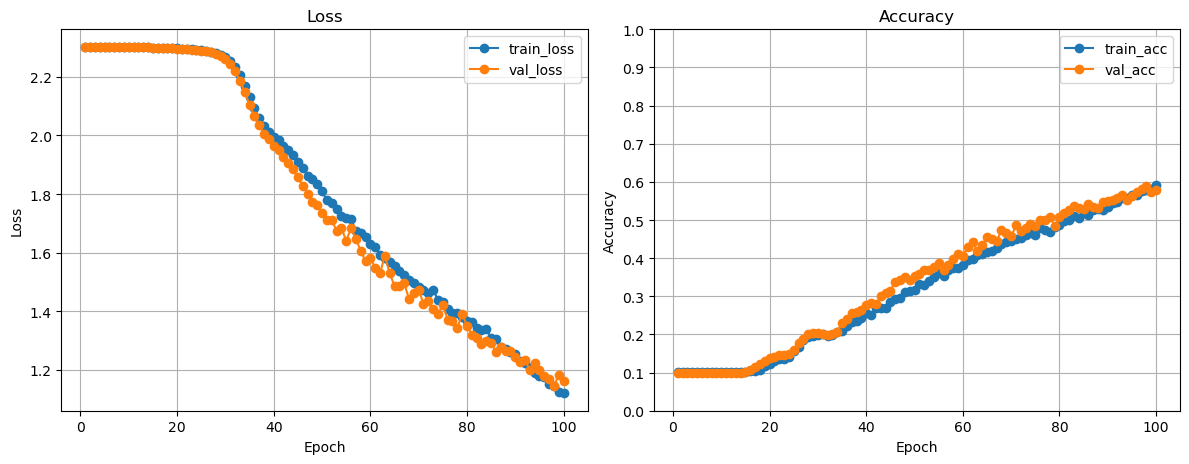

{'data_dir': './data/cifar10', 'checkpoint_name': 'simple_cnn_input_0.1_0.5.pth', 'download_weights': 0, 'classifier': 'simple_cnn', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'input', 'noise_magnitude': 0.1, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.5, 'test_phase': False}
File: simpleCnnTests/metrics/simple_cnn_input_gaussian_0.1_20250519_021427/all_metrics.json
  model : simple
  noise position : cnn
  noise type : input
  noise magnitude : gaussian
  Final Train Accuracy: 0.9759
  Final Val Accuracy:   0.8336



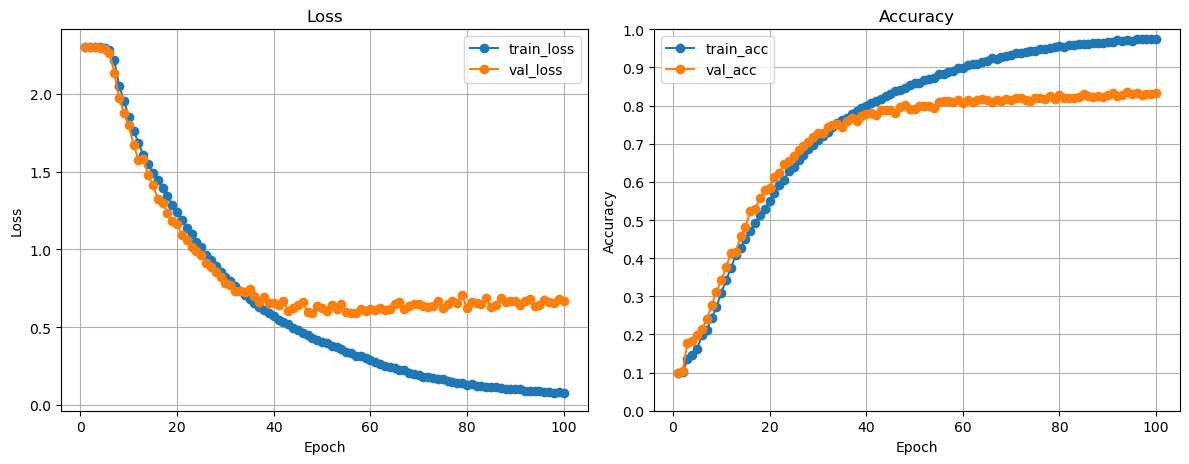

{'data_dir': './data/cifar10', 'checkpoint_name': 'simple_cnn_0.5_baseline.pth', 'download_weights': 0, 'classifier': 'simple_cnn', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 0.5, 'test_phase': False}
File: simpleCnnTests/metrics/simple_cnn_none_20250519_015143/all_metrics.json
  model : simple
  noise position : cnn
  noise type : none
  noise magnitude : 20250519
  Final Train Accuracy: 0.9806
  Final Val Accuracy:   0.8364



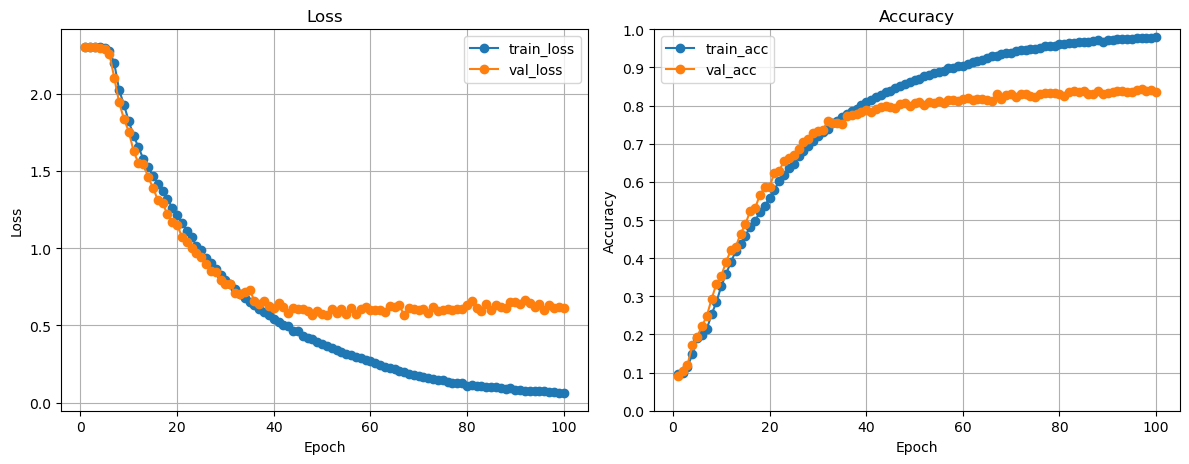

{'data_dir': './data/cifar10', 'checkpoint_name': 'simple_cnn_input_0.1_1.0.pth', 'download_weights': 0, 'classifier': 'simple_cnn', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'input', 'noise_magnitude': 0.1, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'test_phase': False}
File: simpleCnnTests/metrics/simple_cnn_input_gaussian_0.1_20250519_030356/all_metrics.json
  model : simple
  noise position : cnn
  noise type : input
  noise magnitude : gaussian
  Final Train Accuracy: 0.9969
  Final Val Accuracy:   0.8818



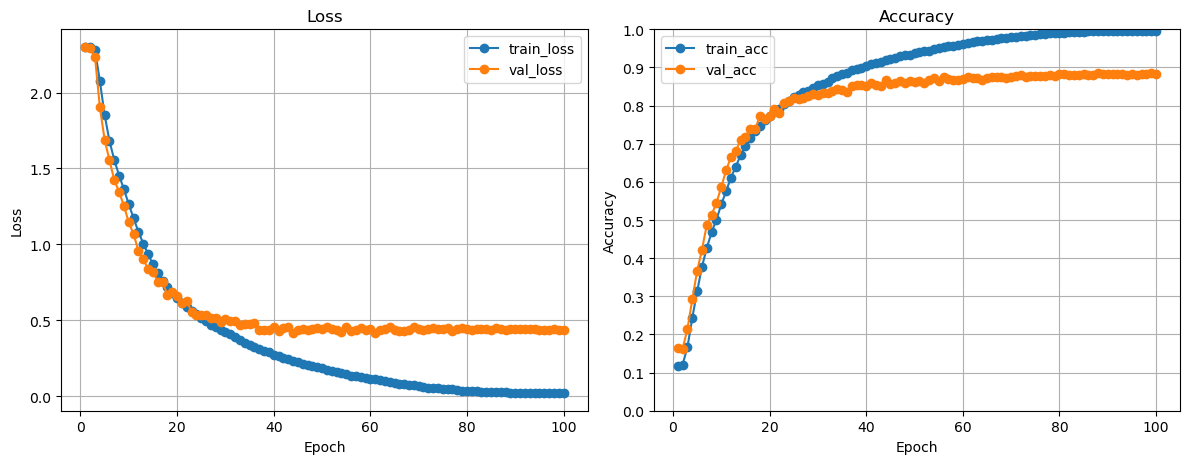

In [11]:
log_dir = "simpleCnnTests/metrics"
plot_all_json(get_all_json(log_dir))

{'data_dir': './data/cifar10', 'checkpoint_name': "resnet18_1.0_gradient_0.01_[<NoiseSchedule.constant: 'constant'>, <NoiseSchedule.linear: 'linear'>, <NoiseSchedule.cosine: 'cosine'>, <NoiseSchedule.exponential: 'exponential'>].pth", 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'test_phase': False}
File: ScheduleTest_constant/checkpoints/metrics/resnet18_gradient_gaussian_0.01_20250523_161533/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9094
  Final Val Accuracy:   0.8715



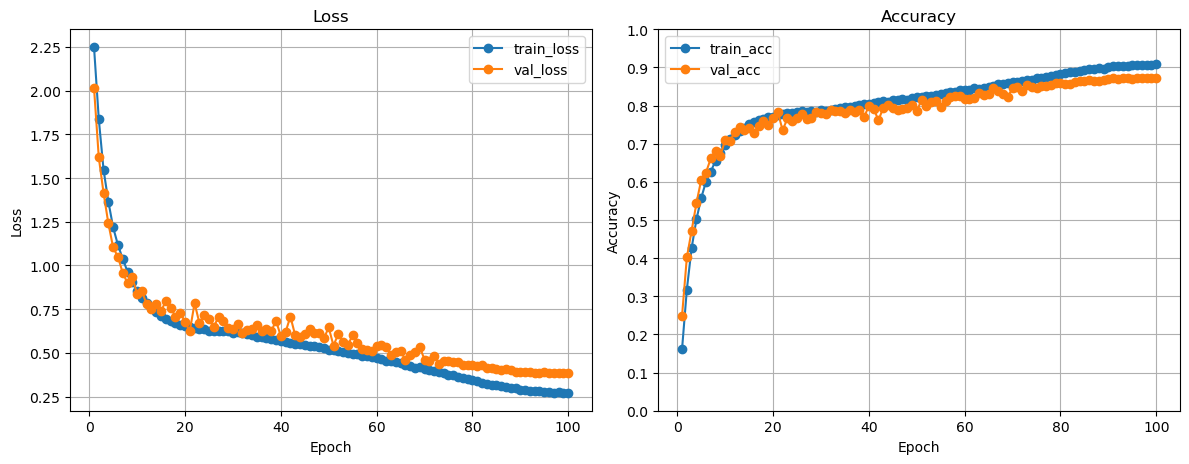

{'data_dir': './data/cifar10', 'checkpoint_name': "resnet18_1.0_gradient_0.01_[<NoiseSchedule.constant: 'constant'>, <NoiseSchedule.linear: 'linear'>, <NoiseSchedule.cosine: 'cosine'>, <NoiseSchedule.exponential: 'exponential'>].pth", 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'test_phase': False}
File: ScheduleTest_constant/checkpoints/metrics/resnet18_gradient_gaussian_0.01_20250523_154941/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9066
  Final Val Accuracy:   0.8688



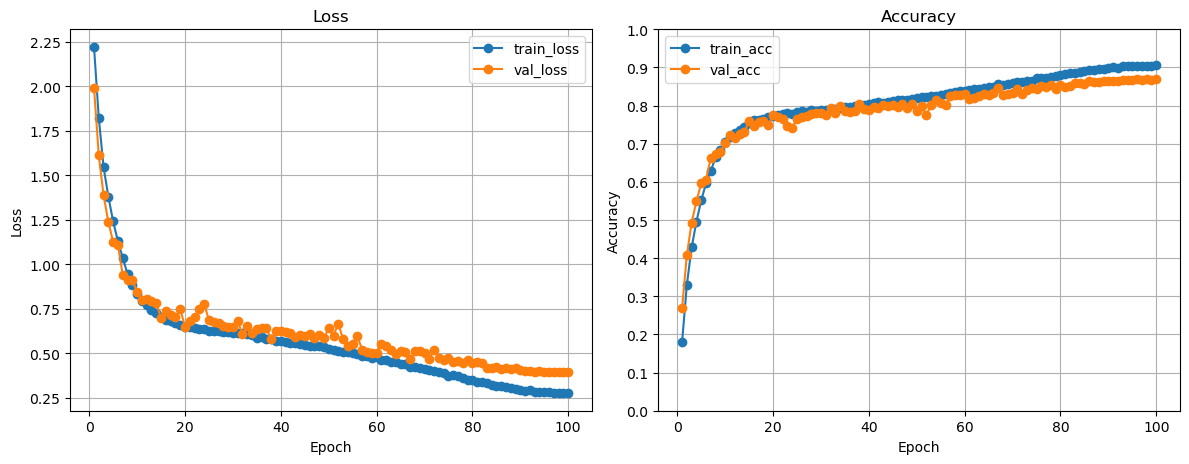

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_baseline.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'test_phase': False}
File: ScheduleTest_constant/checkpoints/metrics/resnet18_none_20250523_144334/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.9991
  Final Val Accuracy:   0.9159



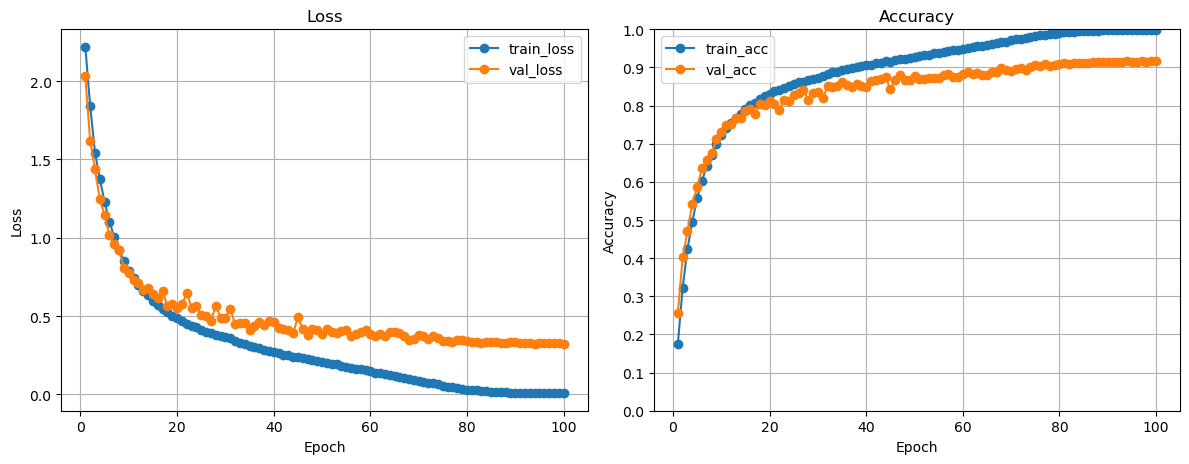

{'data_dir': './data/cifar10', 'checkpoint_name': "resnet18_1.0_gradient_0.01_[<NoiseSchedule.constant: 'constant'>, <NoiseSchedule.linear: 'linear'>, <NoiseSchedule.cosine: 'cosine'>, <NoiseSchedule.exponential: 'exponential'>].pth", 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'test_phase': False}
File: ScheduleTest_constant/checkpoints/metrics/resnet18_gradient_gaussian_0.01_20250523_152355/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9073
  Final Val Accuracy:   0.8738



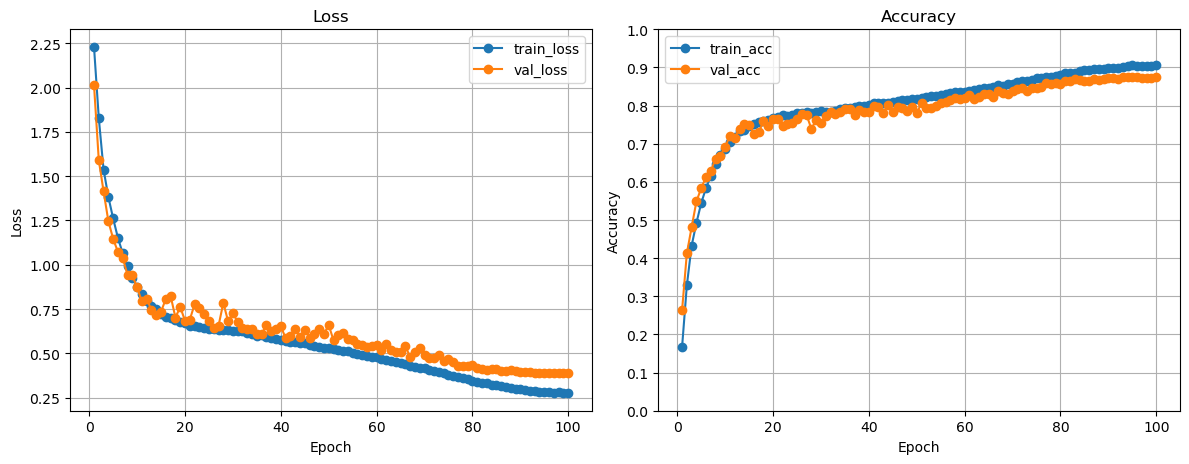

{'data_dir': './data/cifar10', 'checkpoint_name': "resnet18_1.0_gradient_0.01_[<NoiseSchedule.constant: 'constant'>, <NoiseSchedule.linear: 'linear'>, <NoiseSchedule.cosine: 'cosine'>, <NoiseSchedule.exponential: 'exponential'>].pth", 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'test_phase': False}
File: ScheduleTest_constant/checkpoints/metrics/resnet18_gradient_gaussian_0.01_20250523_145806/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9063
  Final Val Accuracy:   0.8723



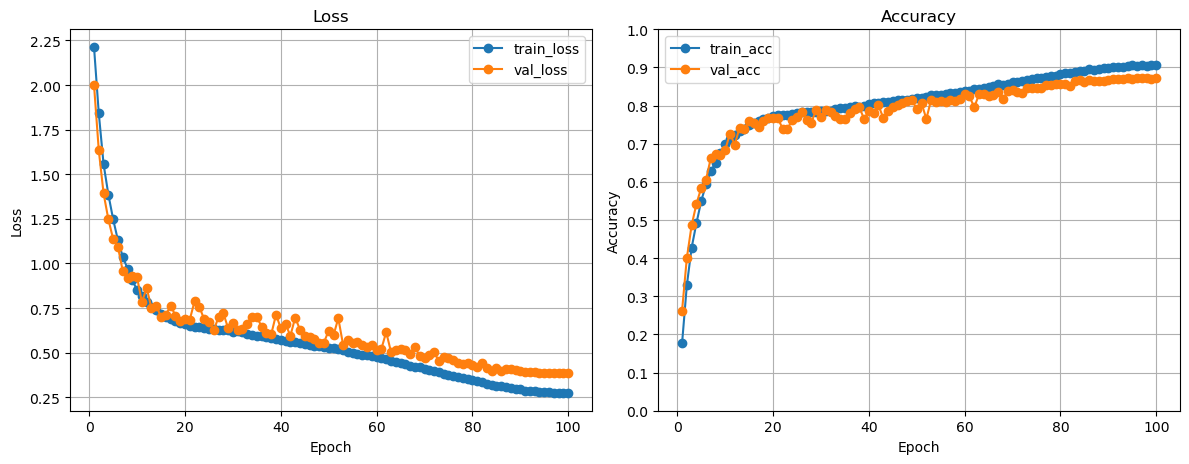

In [12]:
log_dir = "ScheduleTest_constant"
plot_all_json(get_all_json(log_dir))

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_gradient_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'test_phase': False}
File: ScheduleTest_all4/metrics/resnet18_gradient_gaussian_0.01_20250523_210750/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9979
  Final Val Accuracy:   0.9211



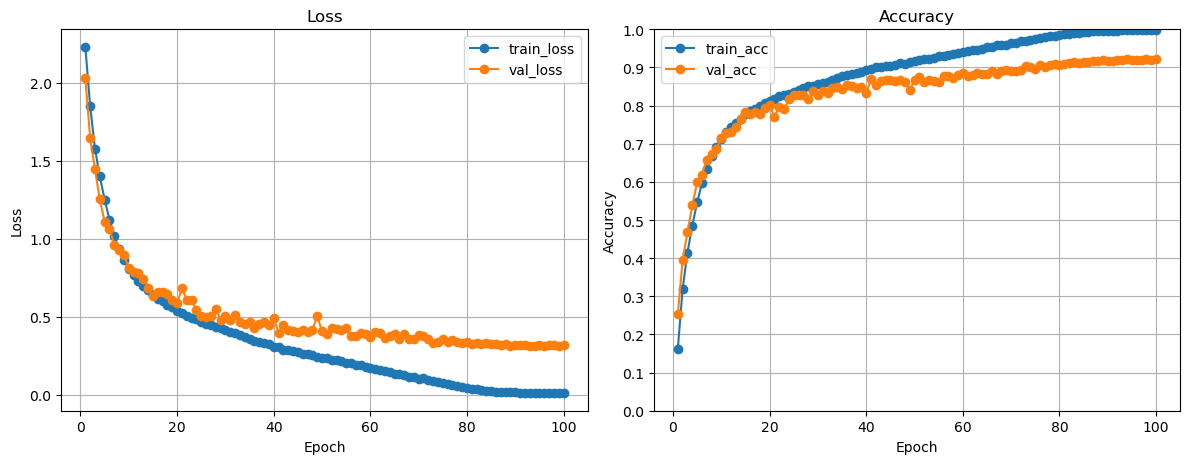

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_gradient_0.01_linear.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'linear', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'test_phase': False}
File: ScheduleTest_all4/metrics/resnet18_gradient_gaussian_0.01_20250523_201617/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9723
  Final Val Accuracy:   0.9011



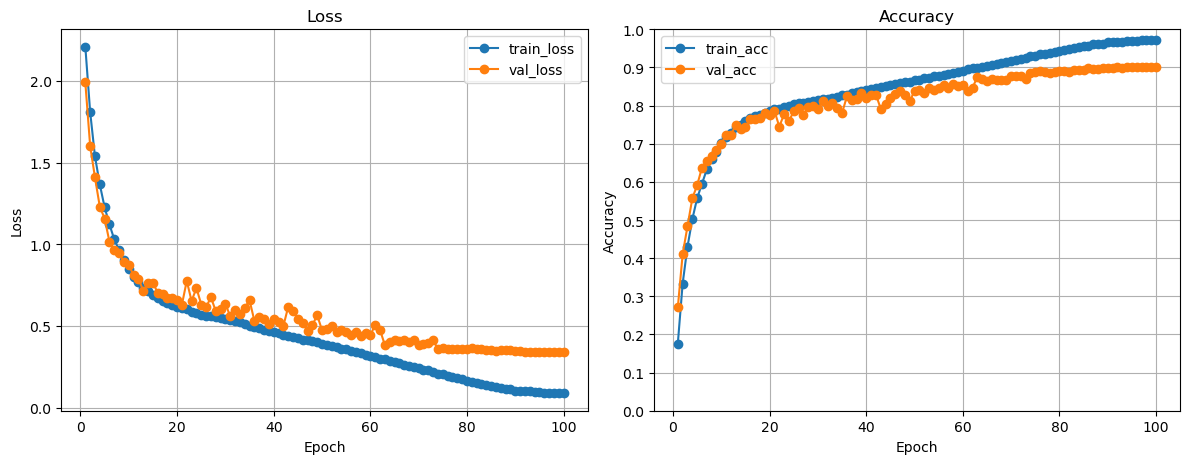

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_baseline.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'test_phase': False}
File: ScheduleTest_all4/metrics/resnet18_none_20250523_200205/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.9988
  Final Val Accuracy:   0.9180



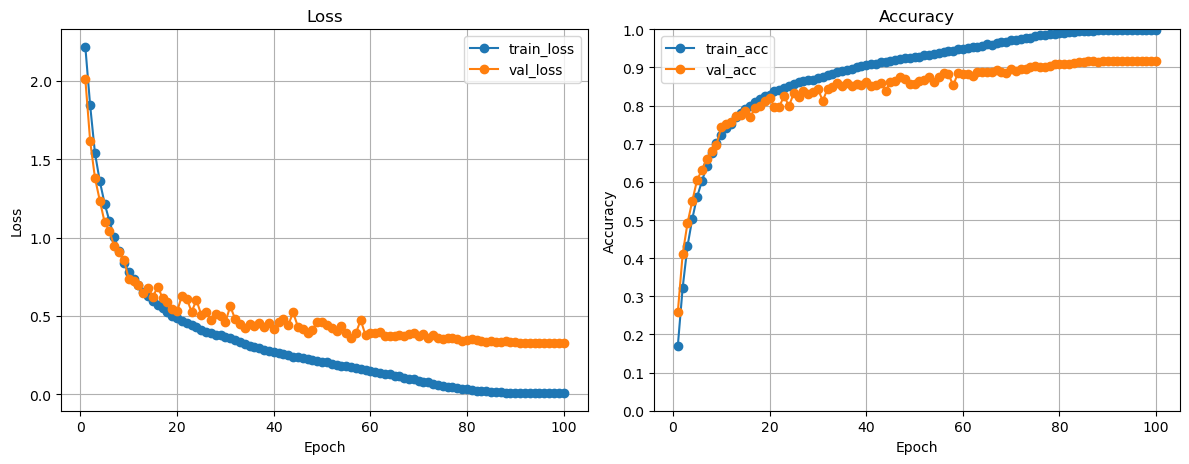

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_gradient_0.01_cosine.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'cosine', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'test_phase': False}
File: ScheduleTest_all4/metrics/resnet18_gradient_gaussian_0.01_20250523_204211/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9705
  Final Val Accuracy:   0.8954



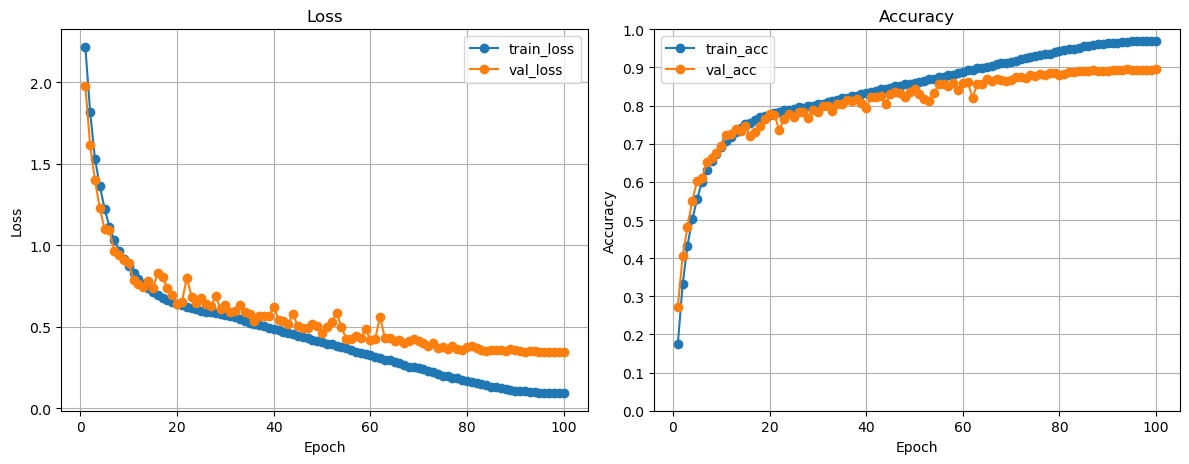

In [14]:
log_dir = "ScheduleTest_all4"
plot_all_json(get_all_json(log_dir))

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.4_weight_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['conv1'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 0.4, 'test_phase': False}
File: rdmExp_tests/metrics/resnet18_weight_gaussian_0.01_20250524_011414/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.7489
  Final Val Accuracy:   0.6967



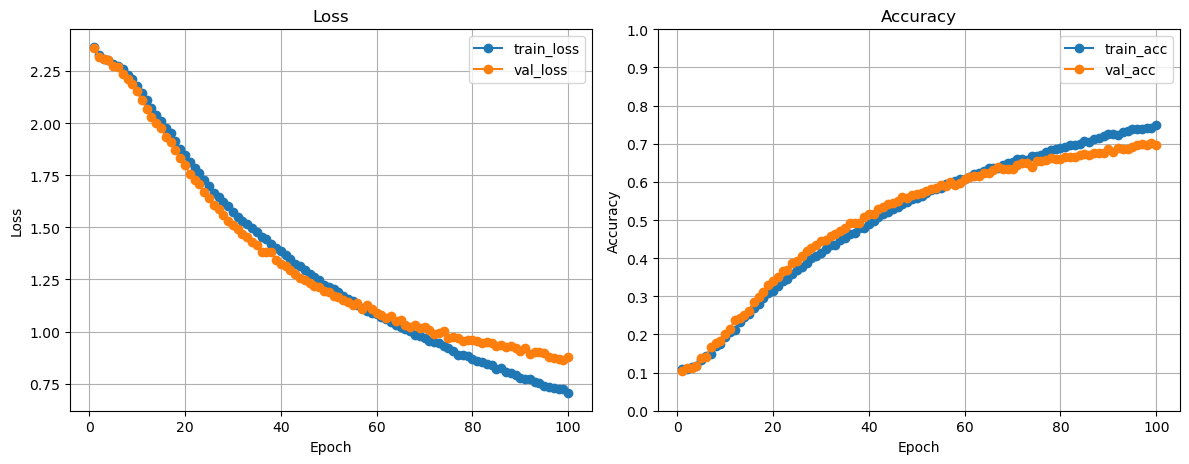

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.4_weight_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['layer4.'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 0.4, 'test_phase': False}
File: rdmExp_tests/metrics/resnet18_weight_gaussian_0.01_20250524_002930/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.8283
  Final Val Accuracy:   0.7470



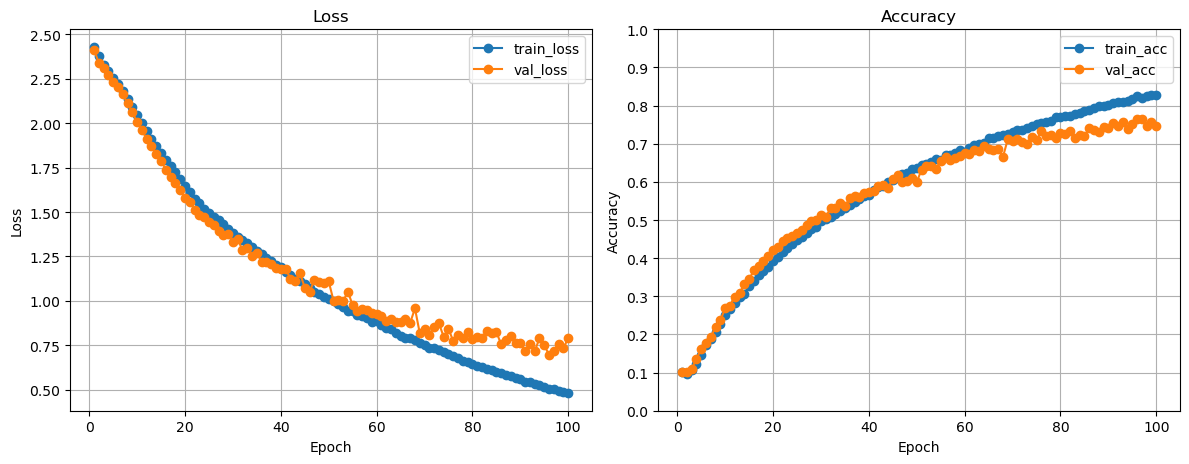

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.4_baseline.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layer': None, 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 0.4, 'test_phase': False}
File: rdmExp_tests/metrics/resnet18_none_20250524_002249/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.8647
  Final Val Accuracy:   0.7578



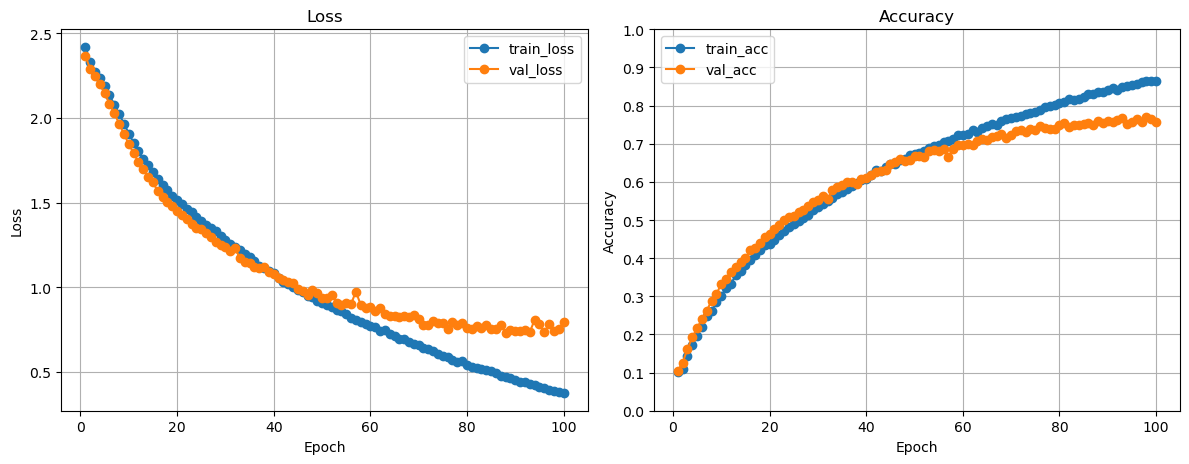

In [7]:
log_dir = "rdmExp_tests"
plot_all_json(get_all_json(log_dir))

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_SGD_base.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.0005, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layer': None, 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.999, 'subset': 1.0, 'test_phase': False}
File: chatAdamTests/checkpoints/metrics/resnet18_none_20250524_023730/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.9989
  Final Val Accuracy:   0.9109



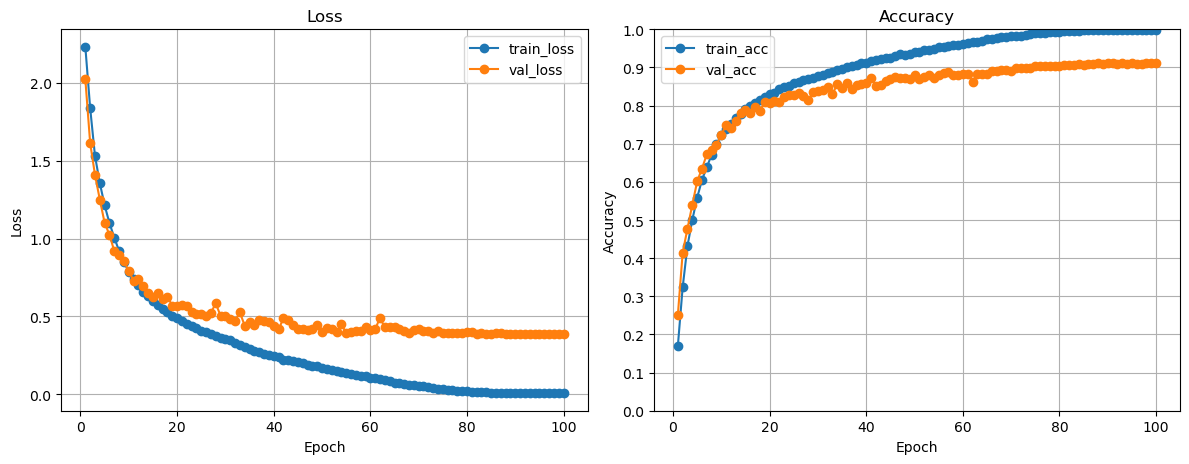

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_Adam_base.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.0, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layer': None, 'noise_distribution': 'gaussian', 'optimizer': 'adam', 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.999, 'subset': 1.0, 'test_phase': False}
File: chatAdamTests/checkpoints/metrics/resnet18_none_20250524_025156/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.9989
  Final Val Accuracy:   0.9226



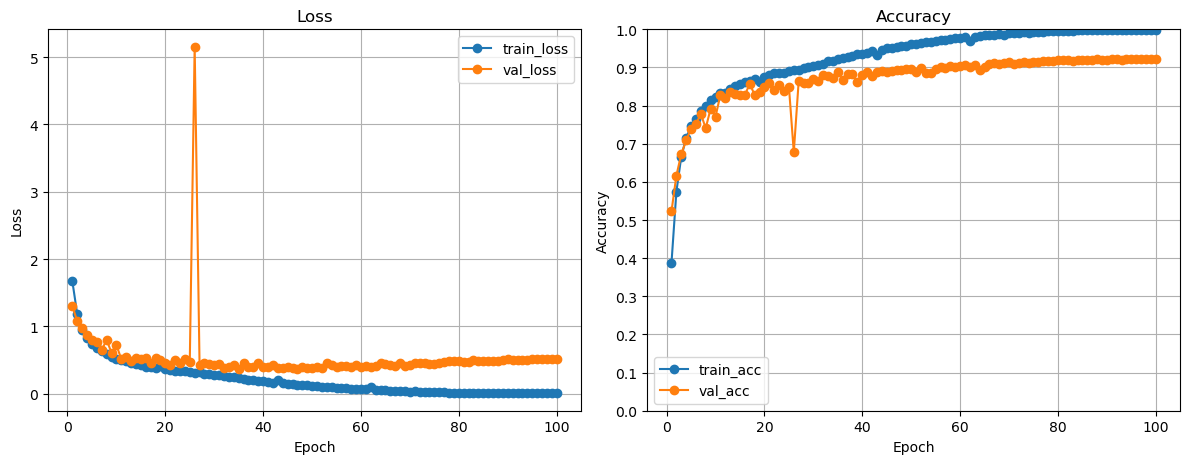

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_Adam_weight_noise_linear.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.0, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'linear', 'noise_layer': None, 'noise_distribution': 'gaussian', 'optimizer': 'adam', 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.999, 'subset': 1.0, 'test_phase': False}
File: chatAdamTests/checkpoints/metrics/resnet18_weight_gaussian_0.01_20250524_033157/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9875
  Final Val Accuracy:   0.8960



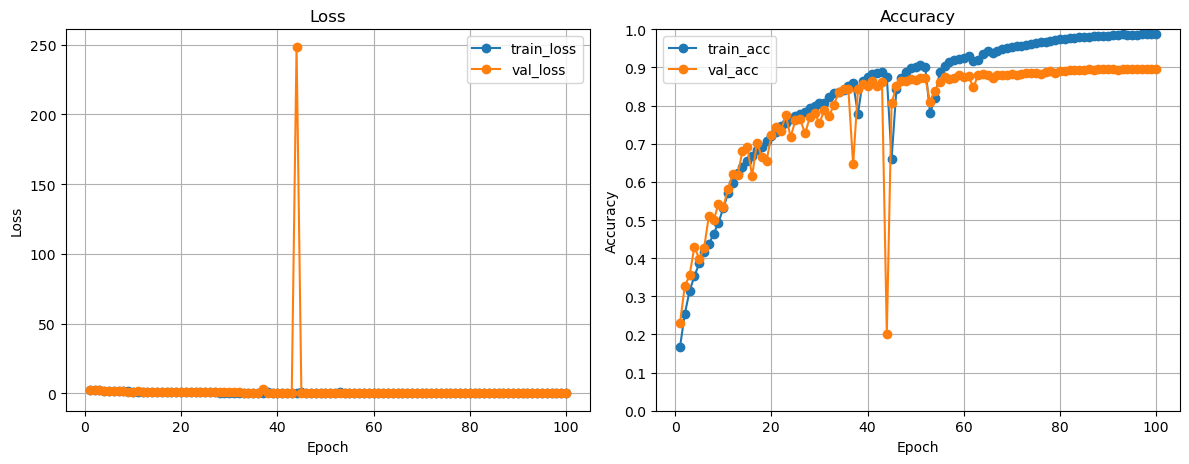

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_SGD_grad_noise_linear.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.0005, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'linear', 'noise_layer': None, 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.999, 'subset': 1.0, 'test_phase': False}
File: chatAdamTests/checkpoints/metrics/resnet18_gradient_gaussian_0.01_20250524_030611/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9540
  Final Val Accuracy:   0.8856



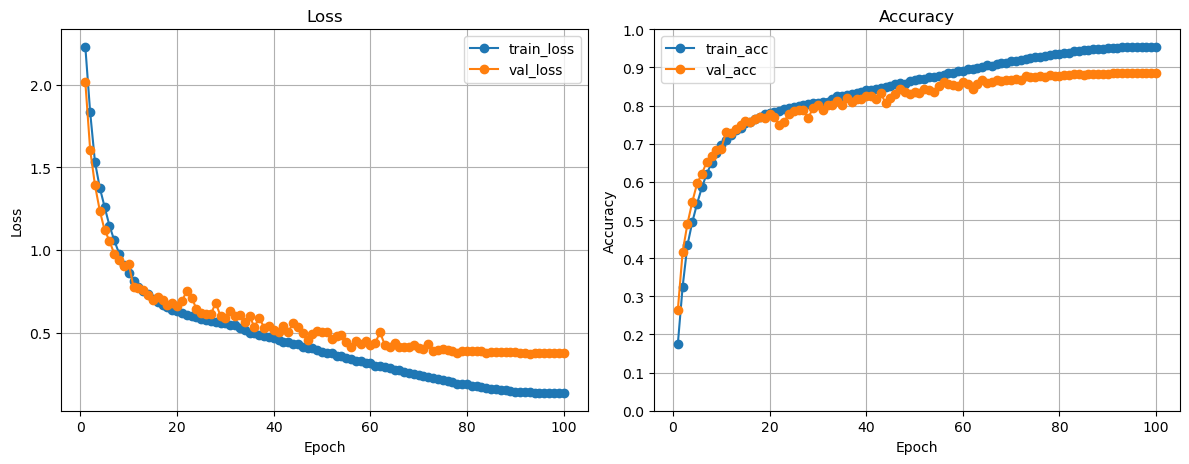

In [7]:
log_dir = "chatAdamTests"
plot_all_json(get_all_json(log_dir))

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.4_weight_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['bias'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 0.4, 'test_phase': False}
File: momentumTest/metrics/resnet18_weight_gaussian_0.01_20250524_015938/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.8624
  Final Val Accuracy:   0.7621



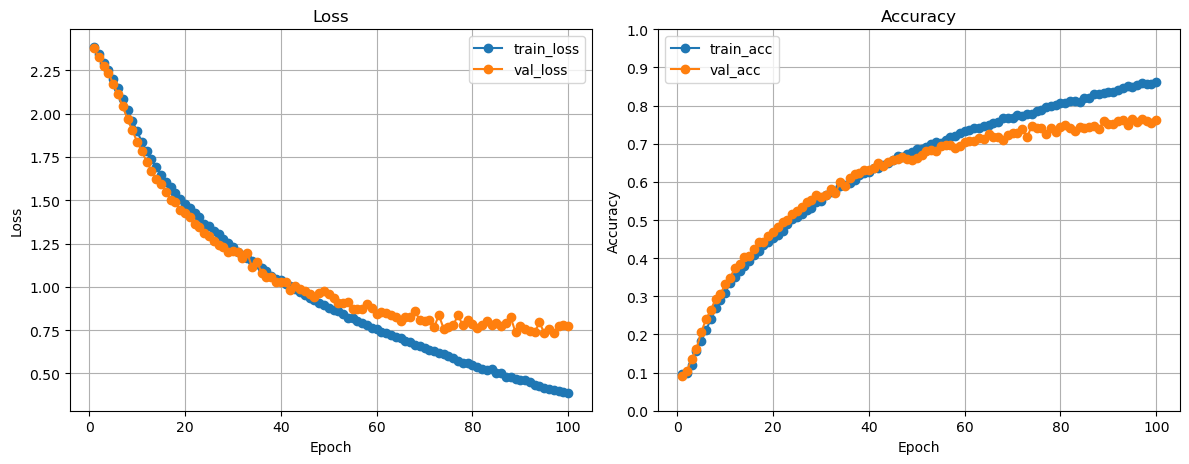

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_weight_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['conv1'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 1.0, 'test_phase': False}
File: momentumTest/metrics/resnet18_weight_gaussian_0.01_20250524_061629/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.8087
  Final Val Accuracy:   0.7754



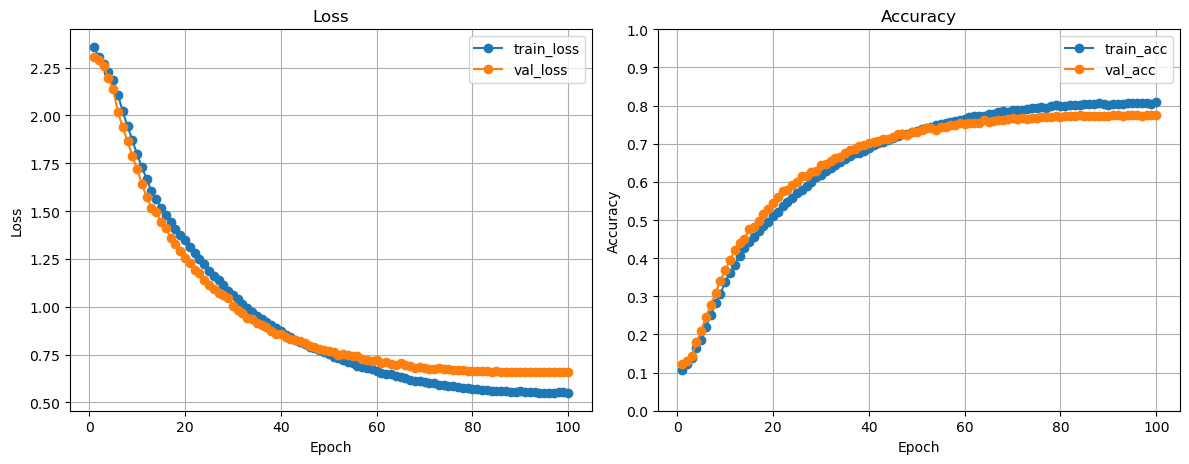

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.4_weight_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['conv1'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 0.4, 'test_phase': False}
File: momentumTest/metrics/resnet18_weight_gaussian_0.01_20250524_011414/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.7489
  Final Val Accuracy:   0.6967



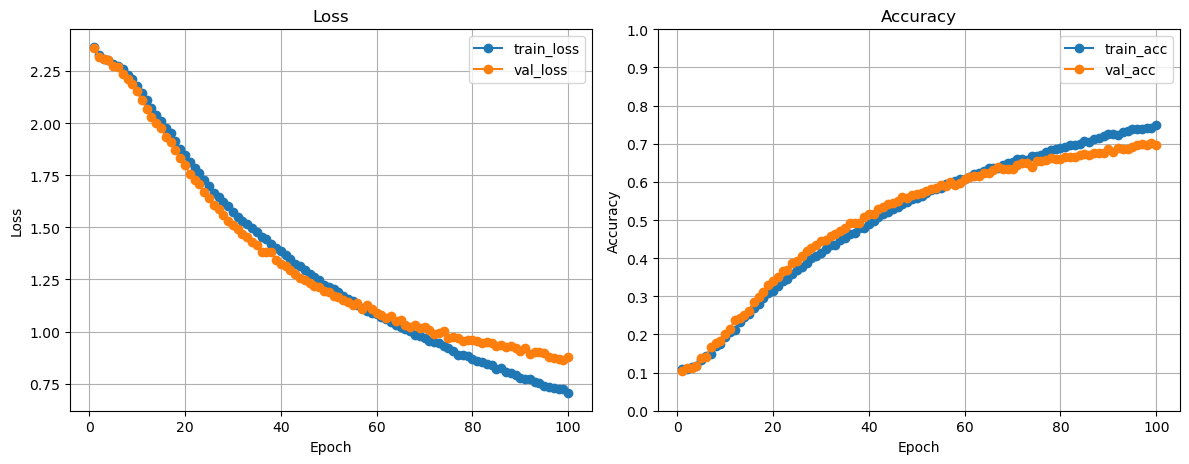

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_baseline.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layer': None, 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 1.0, 'test_phase': False}
File: momentumTest/metrics/resnet18_none_20250524_024512/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.9274
  Final Val Accuracy:   0.8504



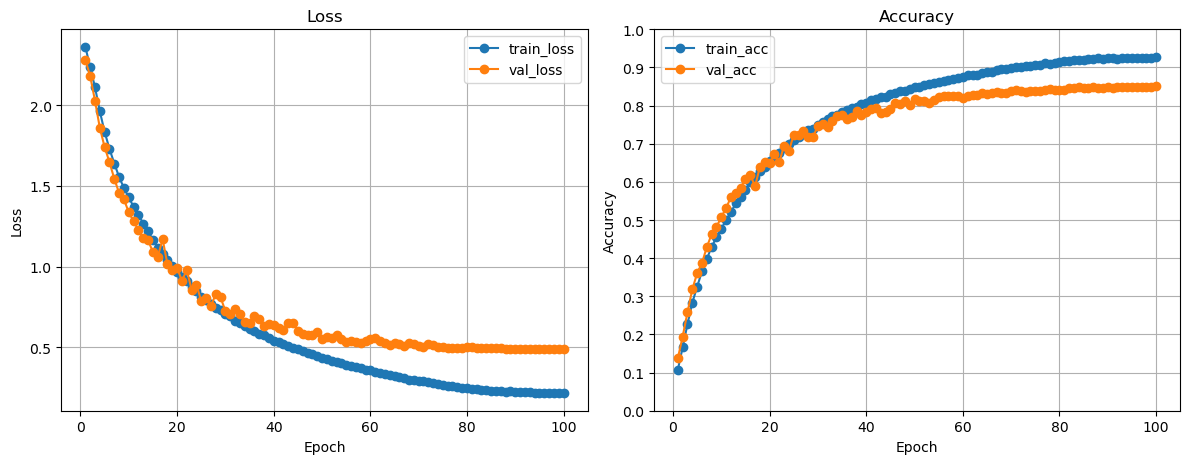

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_weight_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['layer4.'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 1.0, 'test_phase': False}
File: momentumTest/metrics/resnet18_weight_gaussian_0.01_20250524_025855/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9010
  Final Val Accuracy:   0.8488



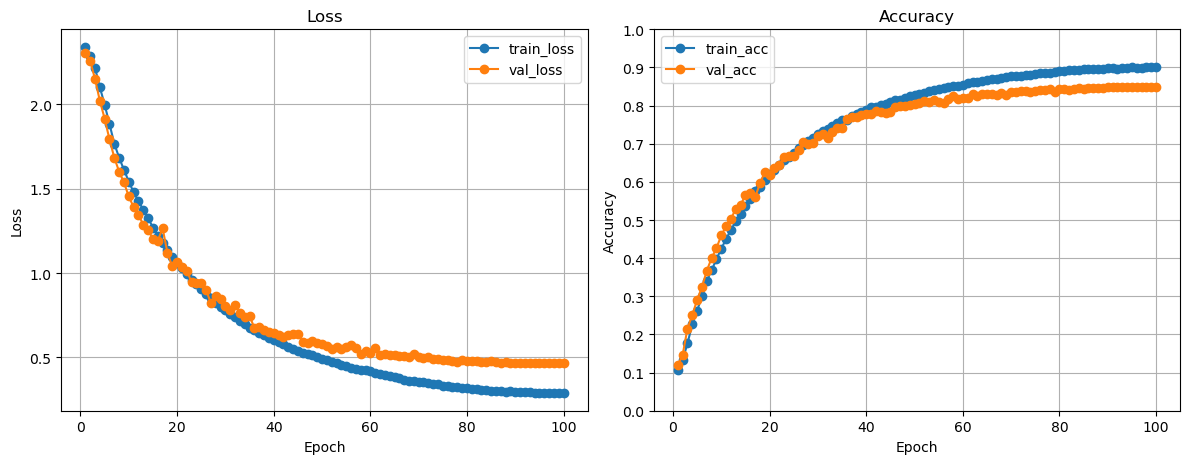

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.4_weight_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['layer4.'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 0.4, 'test_phase': False}
File: momentumTest/metrics/resnet18_weight_gaussian_0.01_20250524_002930/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.8283
  Final Val Accuracy:   0.7470



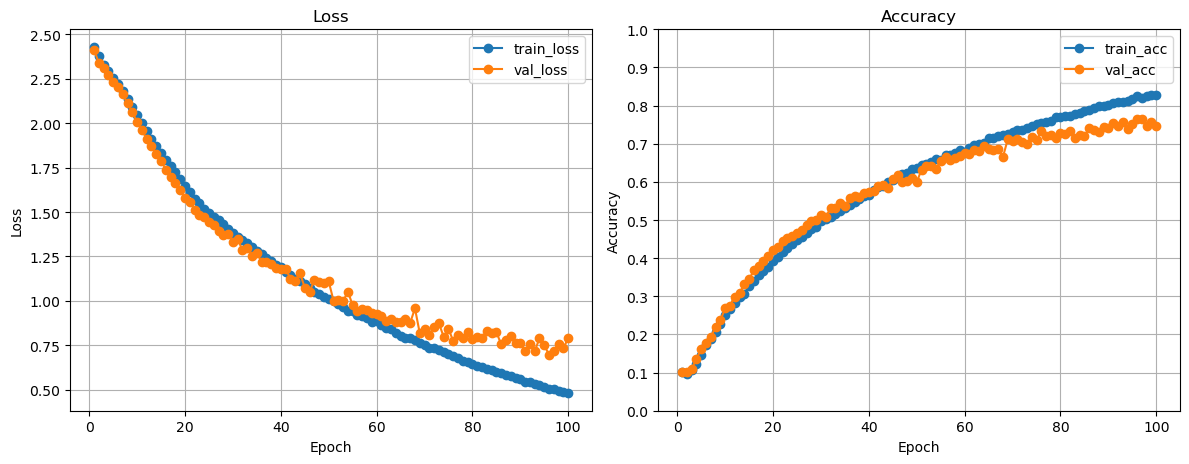

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.4_baseline.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layer': None, 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 0.4, 'test_phase': False}
File: momentumTest/metrics/resnet18_none_20250524_002249/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.8647
  Final Val Accuracy:   0.7578



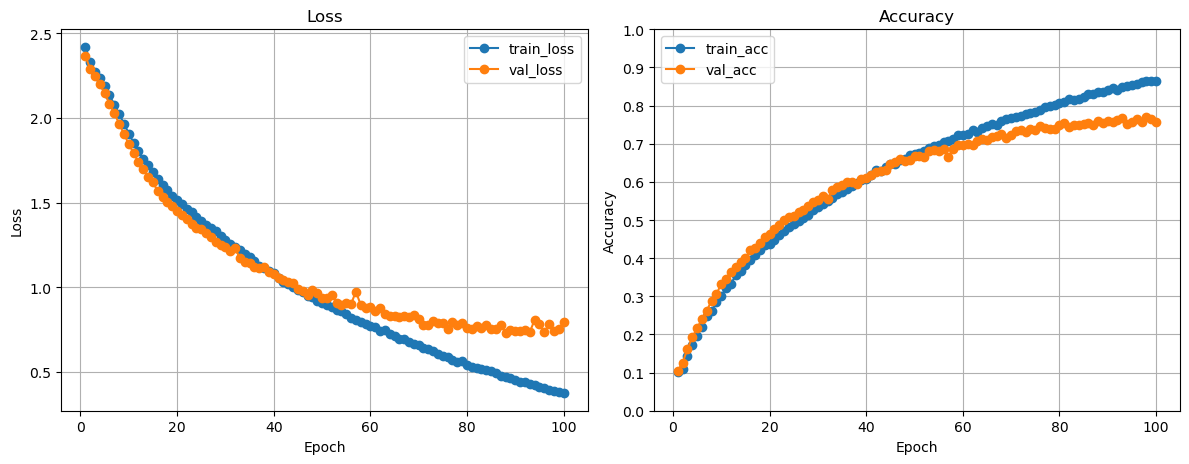

In [12]:
log_dir = "momentumTest_initial"
plot_all_json(get_all_json(log_dir))

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_weight_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layers': None, 'noise_distribution': 'gaussian', 'subset': 1.0, 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'test_phase': False}
File: adri_weights_no_reset/all_metrics.json
  model : adri
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.8118
  Final Val Accuracy:   0.8038



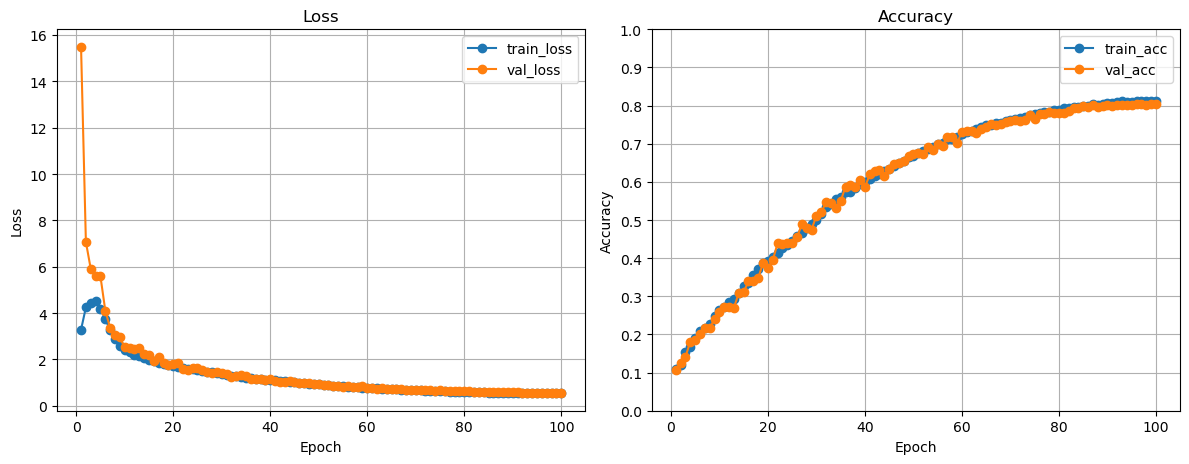

In [7]:
log_dir = "adri_weights_no_reset"
plot_all_json(get_all_json(log_dir))

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_baseline.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layer': None, 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.999, 'subset': 1.0, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_none_20250525_031412/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.9987
  Final Val Accuracy:   0.9172



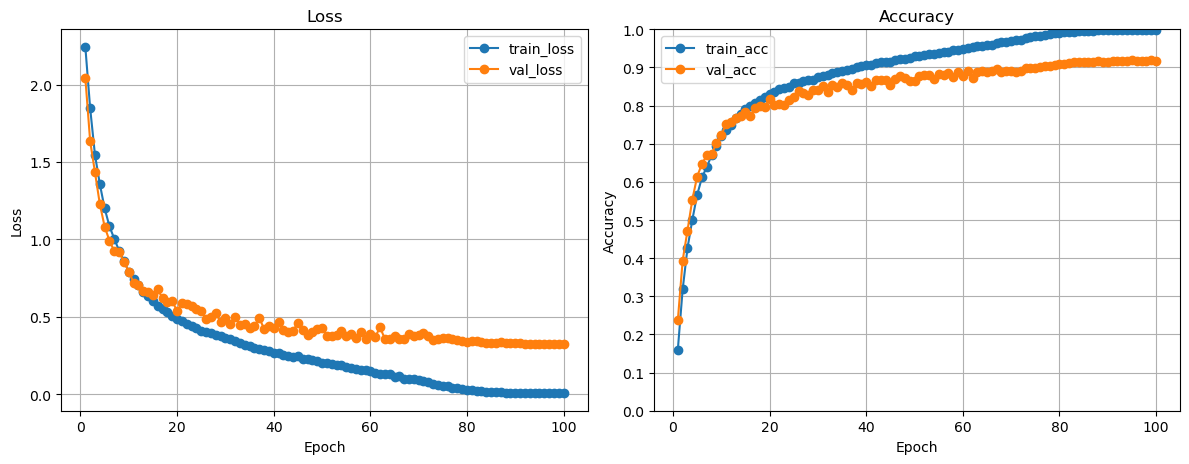

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_weight_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['layer4.'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.999, 'subset': 1.0, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_weight_gaussian_0.01_20250524_170620/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9986
  Final Val Accuracy:   0.9164



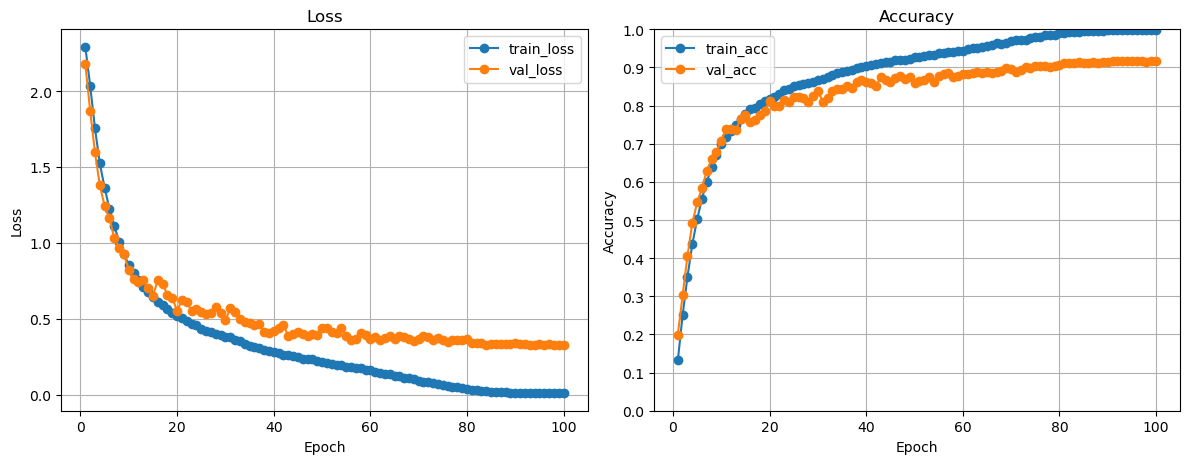

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.4_weight_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['bias'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 0.4, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_weight_gaussian_0.01_20250524_015938/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.8624
  Final Val Accuracy:   0.7621



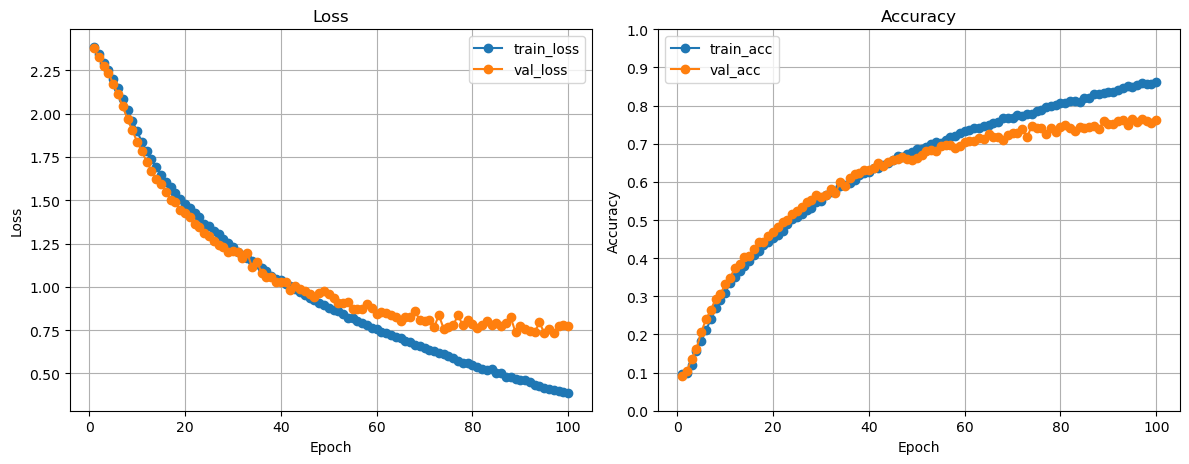

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_weight_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['conv1'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 1.0, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_weight_gaussian_0.01_20250524_061629/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.8087
  Final Val Accuracy:   0.7754



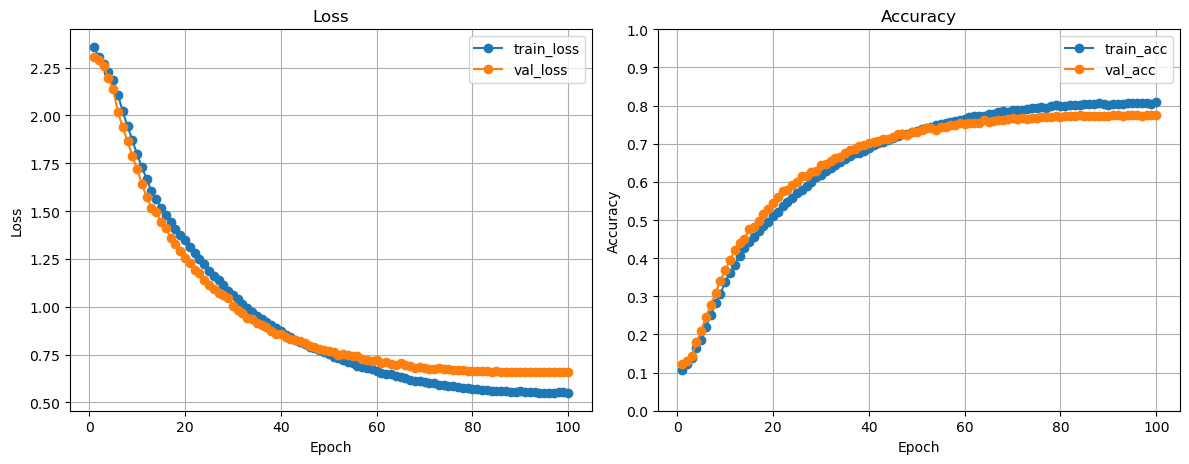

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_weight_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['bias'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 1.0, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_weight_gaussian_0.01_20250524_093306/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9260
  Final Val Accuracy:   0.8534



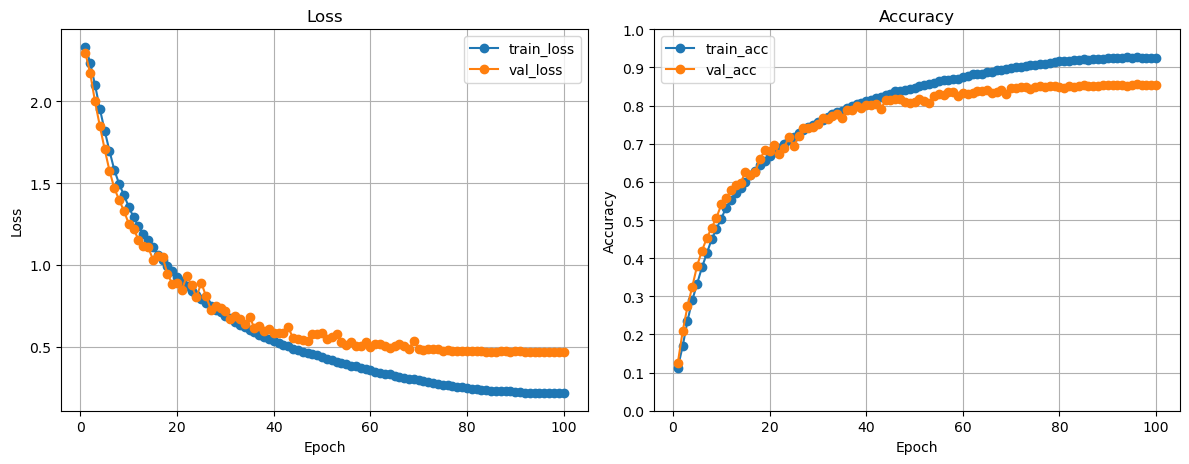

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.4_weight_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['conv1'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.999, 'subset': 0.4, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_weight_gaussian_0.01_20250524_152316/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9327
  Final Val Accuracy:   0.7980



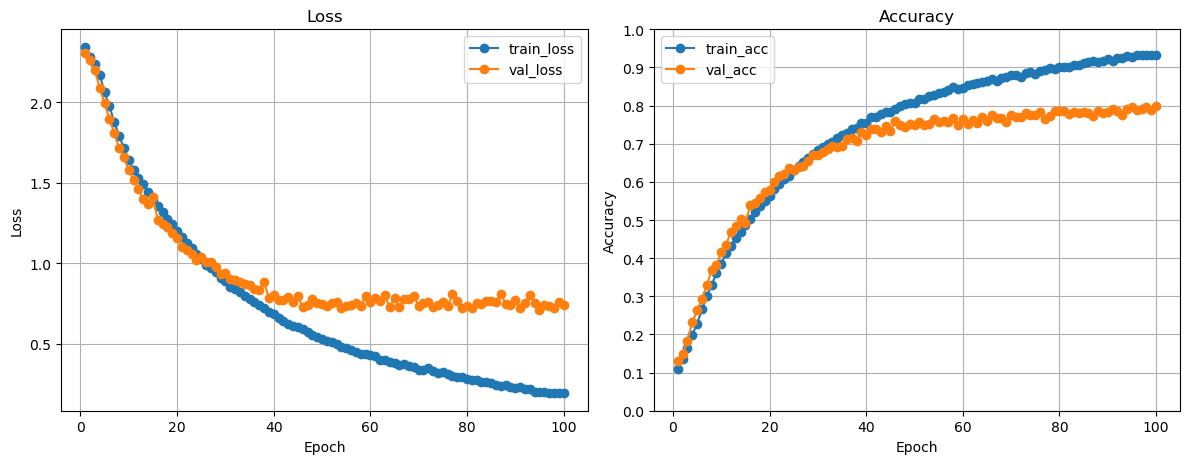

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.4_gradient_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['bias'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 0.4, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_gradient_gaussian_0.01_20250524_131344/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.8646
  Final Val Accuracy:   0.7607



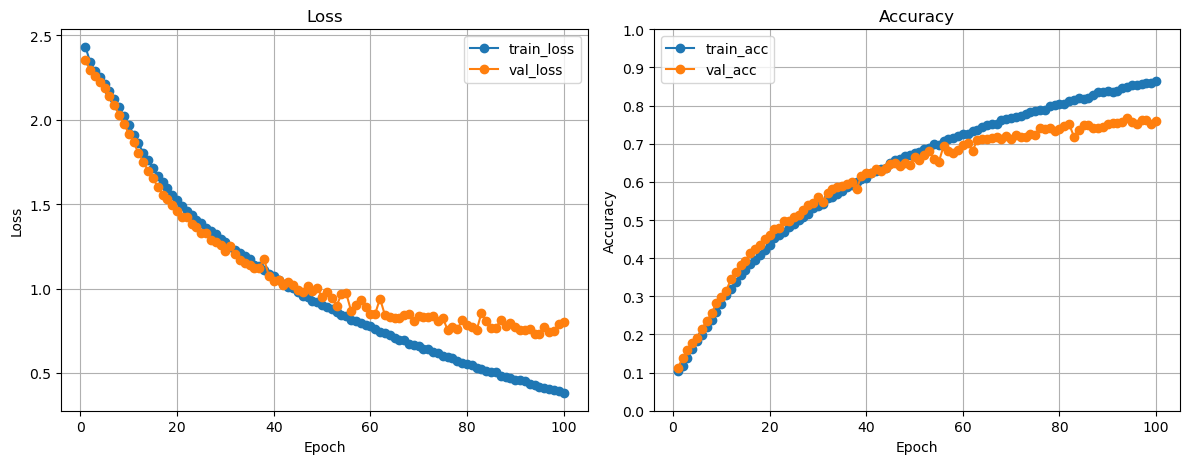

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_baseline.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layer': None, 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 1.0, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_none_20250524_132205/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.9264
  Final Val Accuracy:   0.8515



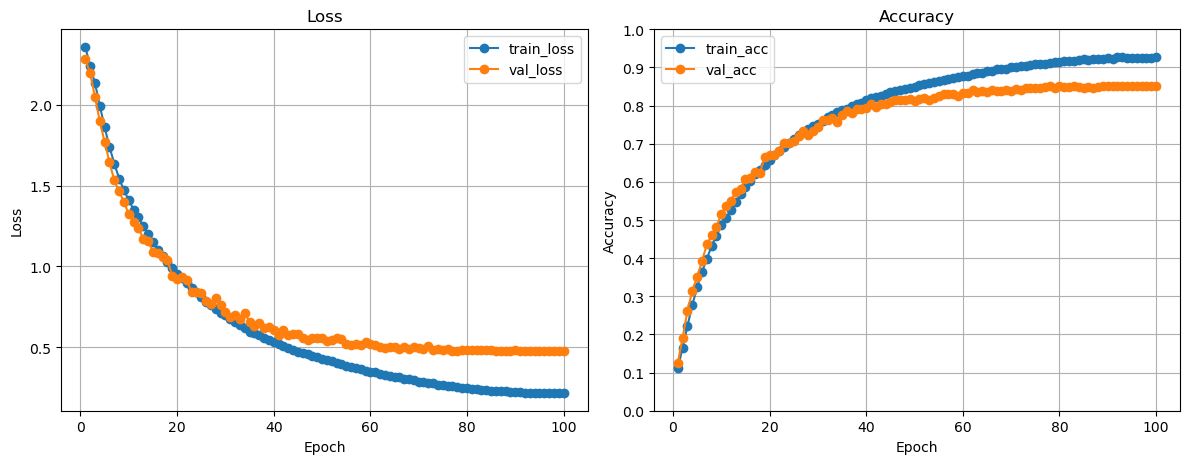

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.4_weight_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['conv1'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 0.4, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_weight_gaussian_0.01_20250524_011414/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.7489
  Final Val Accuracy:   0.6967



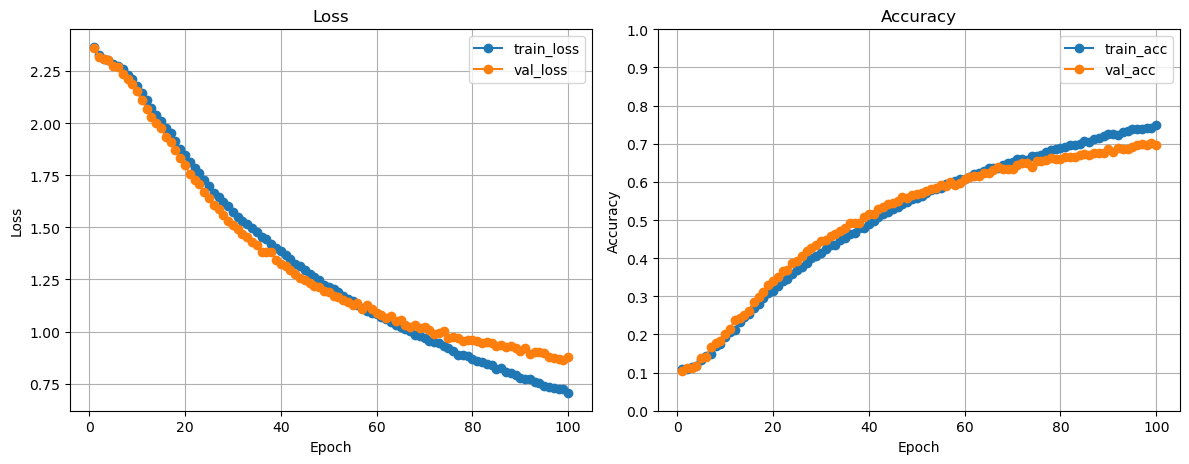

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_weight_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['bias'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.999, 'subset': 1.0, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_weight_gaussian_0.01_20250524_233218/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9984
  Final Val Accuracy:   0.9205



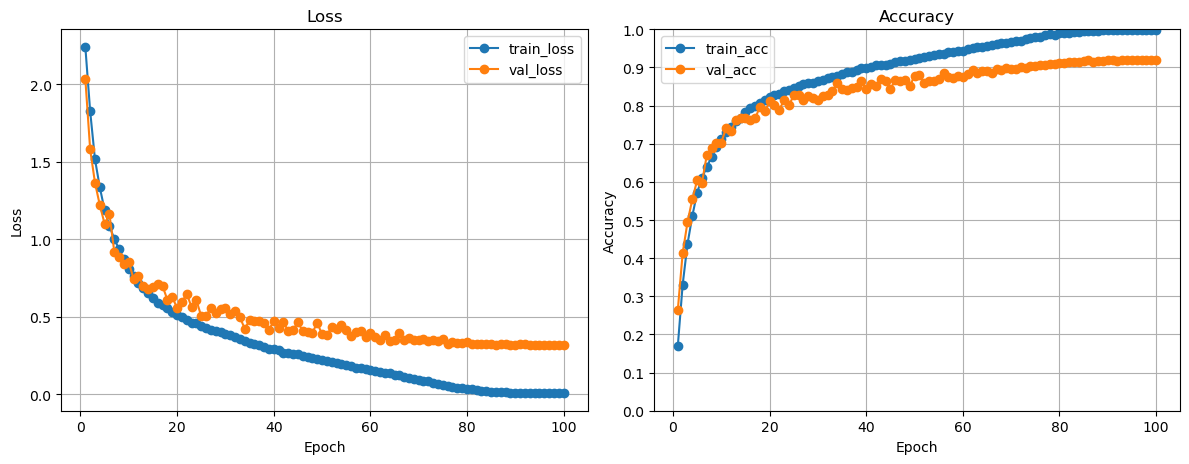

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_gradient_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['bias'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.999, 'subset': 1.0, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_gradient_gaussian_0.01_20250525_040447/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9987
  Final Val Accuracy:   0.9204



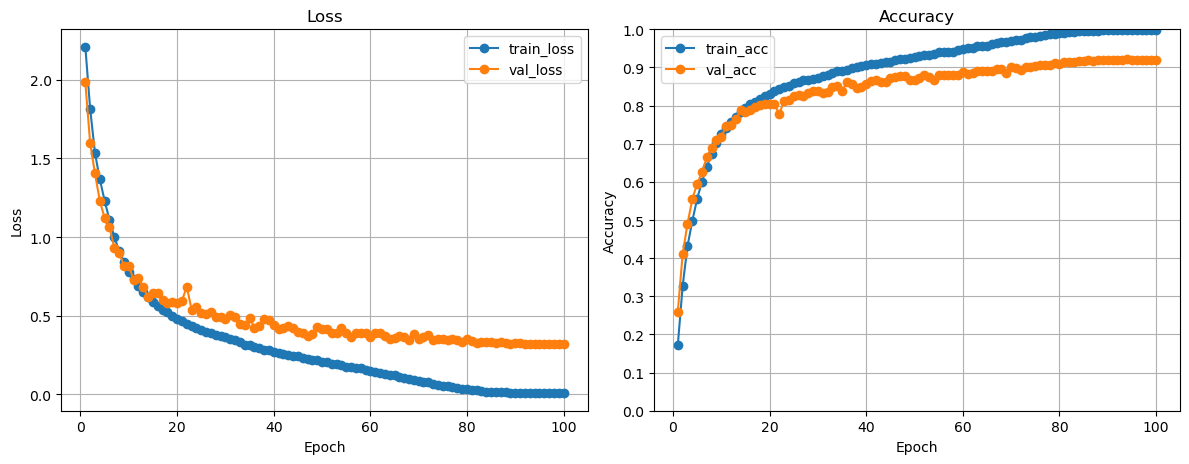

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.4_baseline.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layer': None, 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.999, 'subset': 0.4, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_none_20250524_143211/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.9496
  Final Val Accuracy:   0.8120



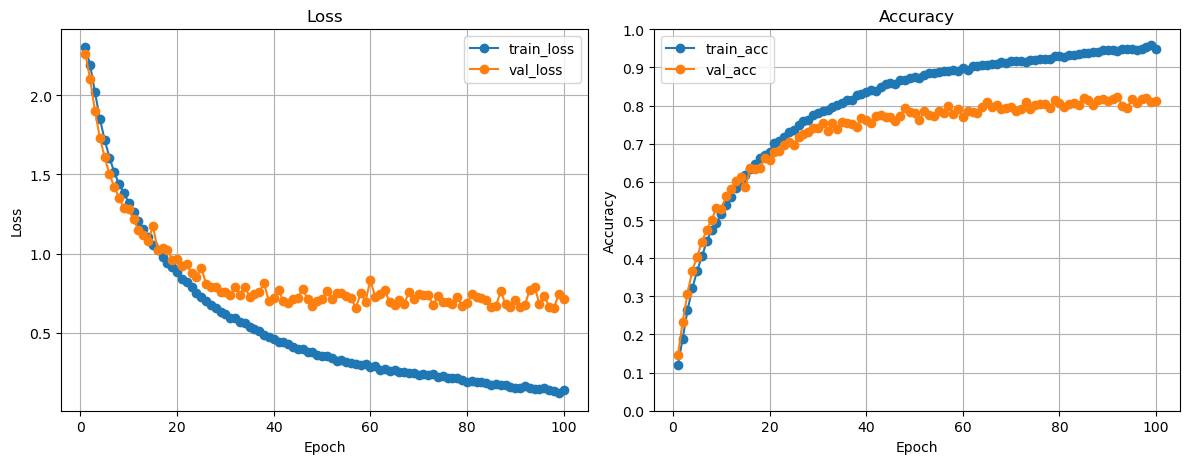

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_gradient_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['conv1'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.999, 'subset': 1.0, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_gradient_gaussian_0.01_20250525_034645/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9984
  Final Val Accuracy:   0.9178



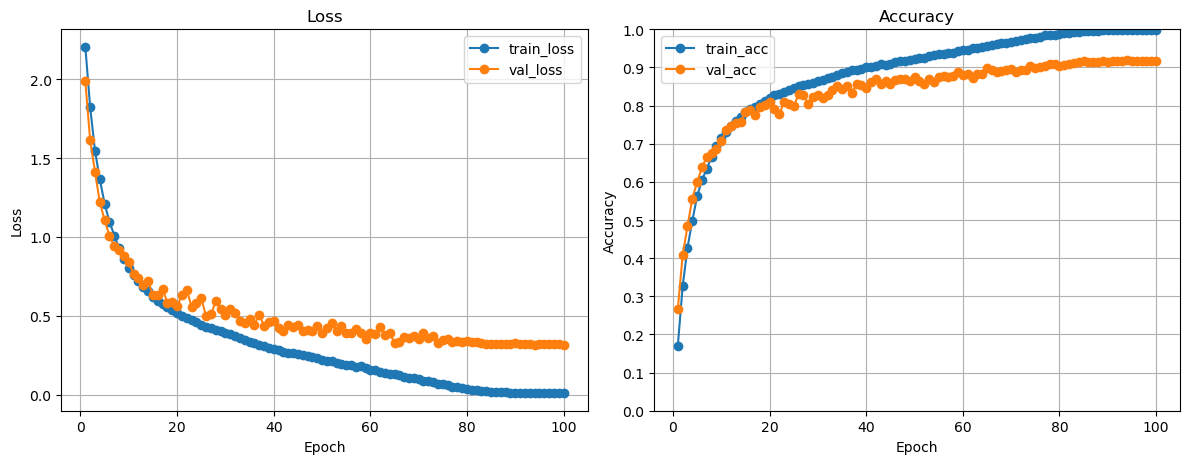

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_baseline.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layer': None, 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 1.0, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_none_20250524_024512/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.9274
  Final Val Accuracy:   0.8504



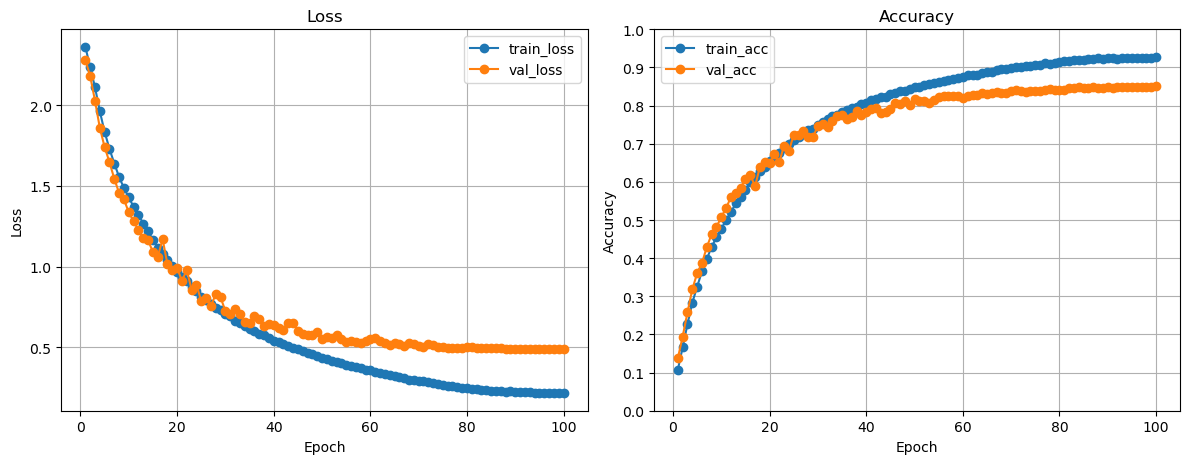

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.4_baseline.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layer': None, 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.999, 'subset': 0.4, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_none_20250525_024348/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.9519
  Final Val Accuracy:   0.8046



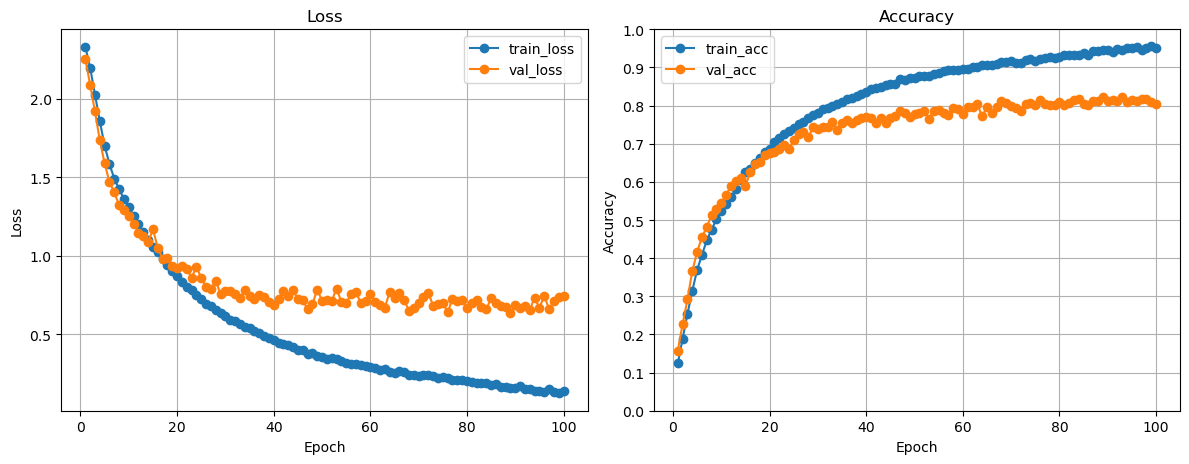

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.4_gradient_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['layer4.'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 0.4, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_gradient_gaussian_0.01_20250524_125802/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.8697
  Final Val Accuracy:   0.7577



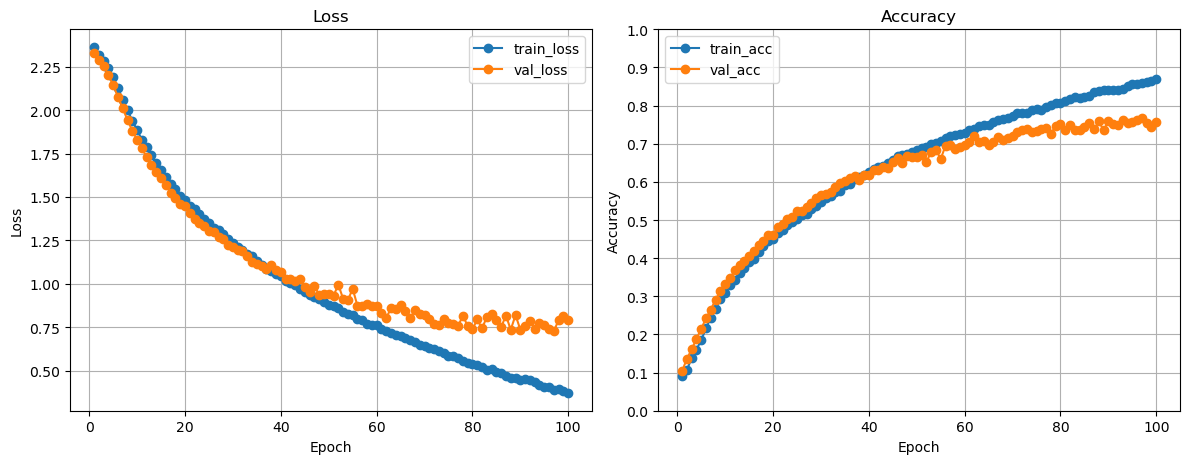

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.4_weight_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['bias'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.999, 'subset': 0.4, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_weight_gaussian_0.01_20250524_160757/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9487
  Final Val Accuracy:   0.8253



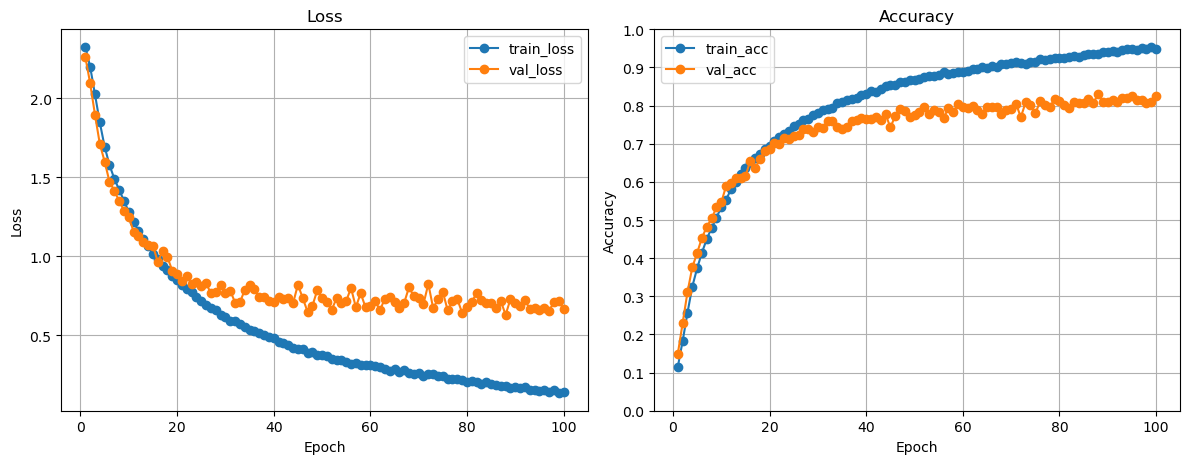

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.4_gradient_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['conv1'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 0.4, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_gradient_gaussian_0.01_20250524_130602/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.8634
  Final Val Accuracy:   0.7530



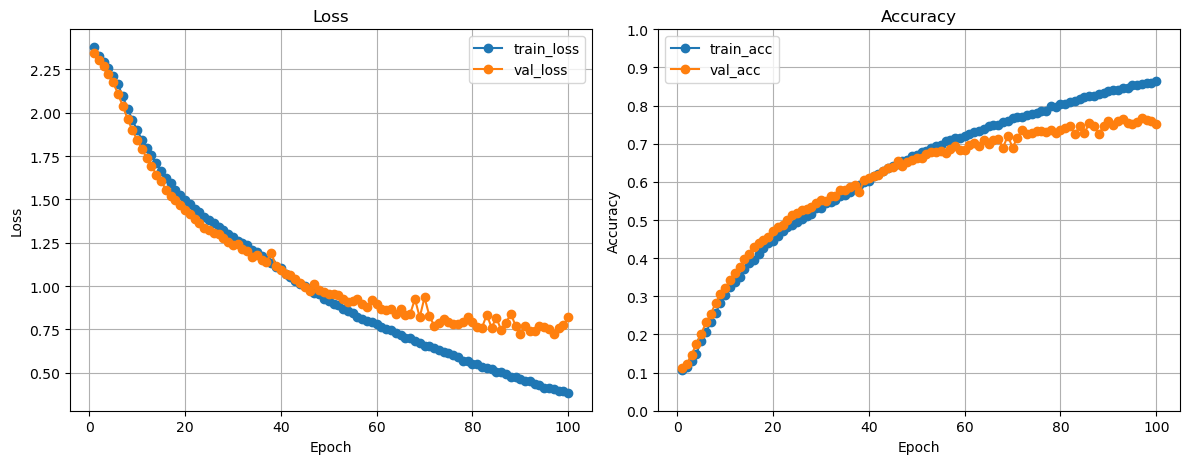

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.4_gradient_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['conv1'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.999, 'subset': 0.4, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_gradient_gaussian_0.01_20250525_025808/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9539
  Final Val Accuracy:   0.7972



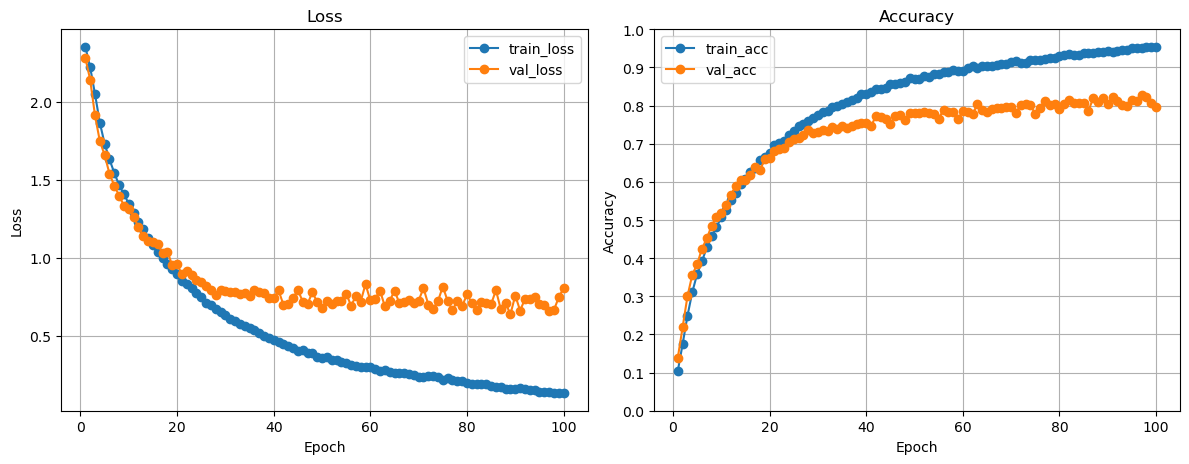

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_weight_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['conv1'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.999, 'subset': 1.0, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_weight_gaussian_0.01_20250524_201915/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9916
  Final Val Accuracy:   0.8900



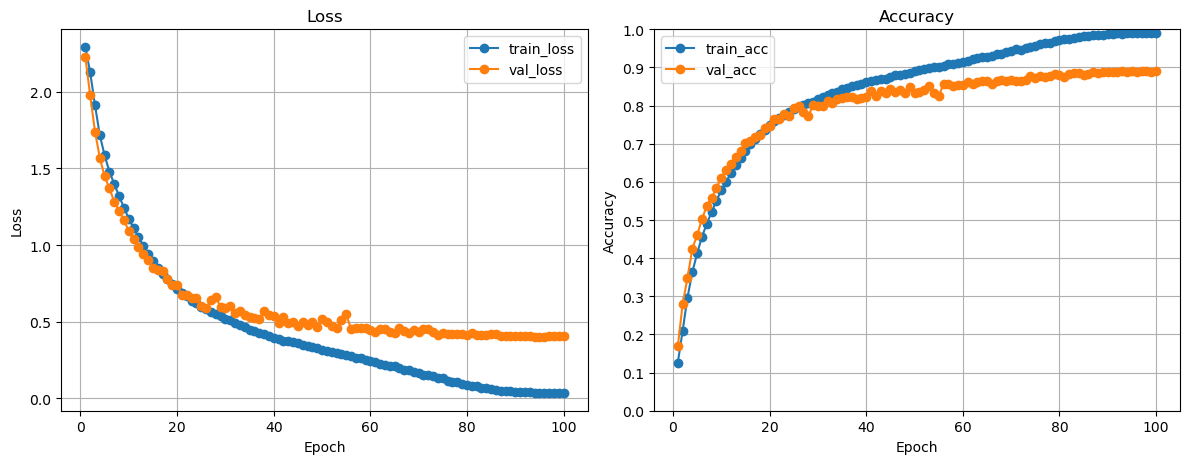

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_gradient_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['layer4.'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.999, 'subset': 1.0, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_gradient_gaussian_0.01_20250525_032805/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9985
  Final Val Accuracy:   0.9205



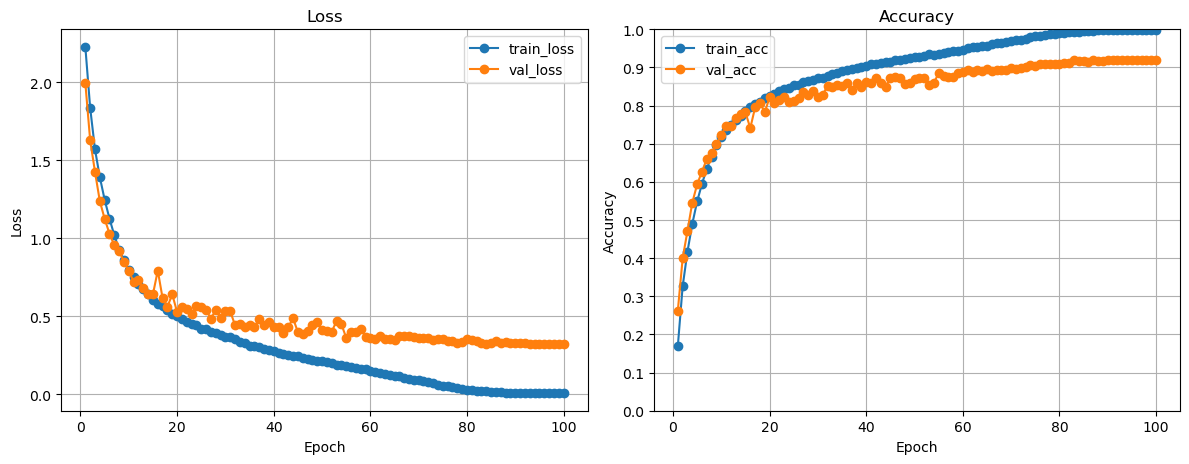

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.4_gradient_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['bias'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.999, 'subset': 0.4, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_gradient_gaussian_0.01_20250525_030555/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9554
  Final Val Accuracy:   0.7987



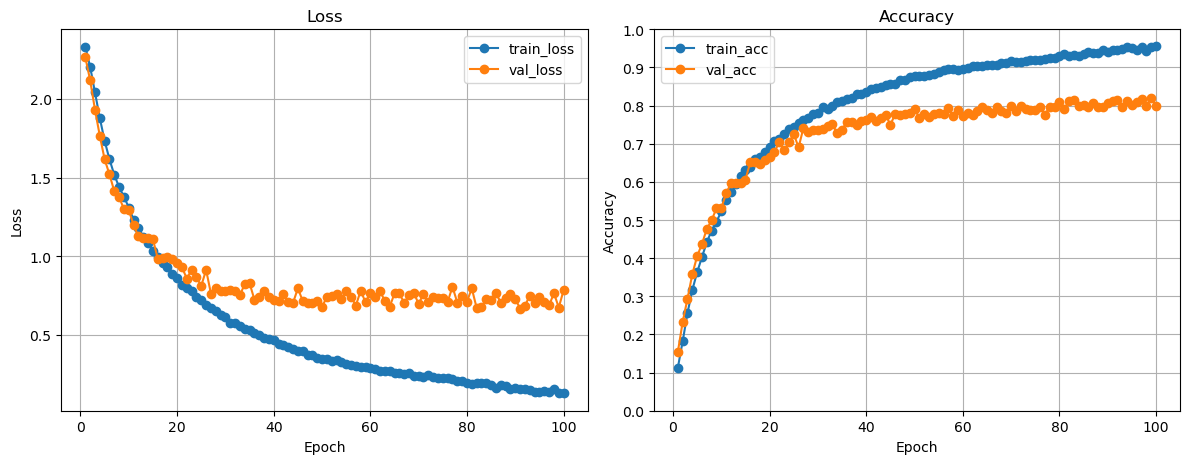

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_weight_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['layer4.'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 1.0, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_weight_gaussian_0.01_20250524_025855/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9010
  Final Val Accuracy:   0.8488



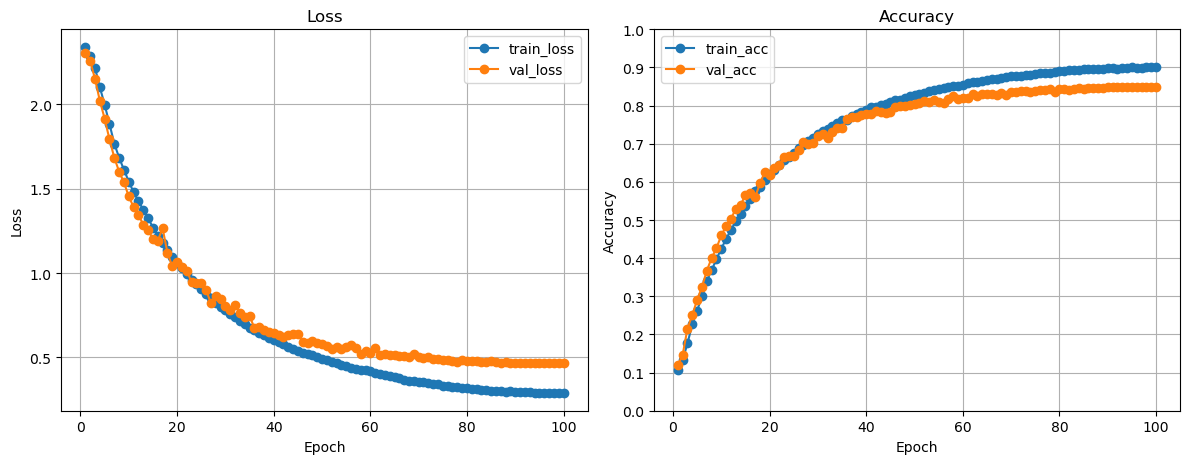

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.4_gradient_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['layer4.'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.999, 'subset': 0.4, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_gradient_gaussian_0.01_20250525_025010/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9534
  Final Val Accuracy:   0.8271



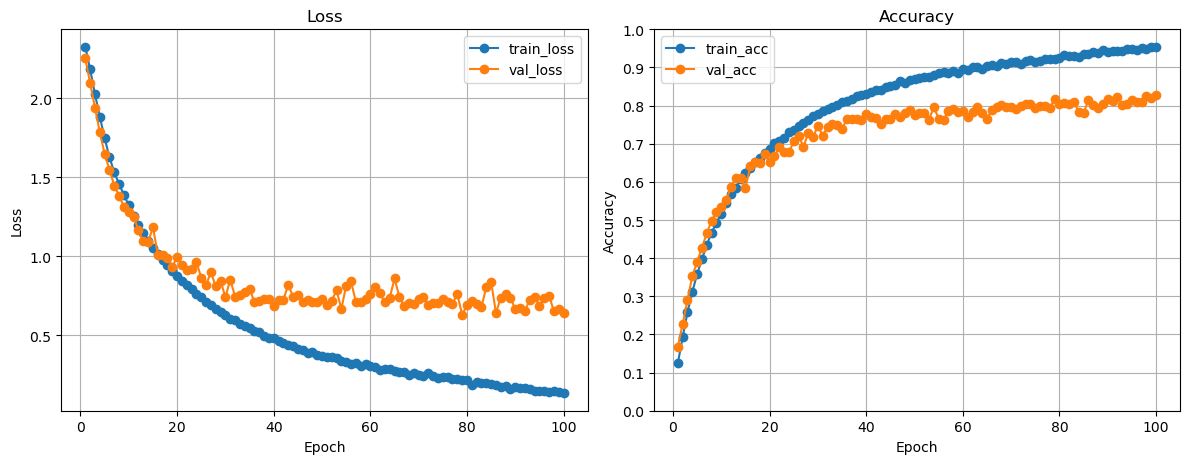

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_gradient_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['bias'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 1.0, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_gradient_gaussian_0.01_20250524_141245/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9292
  Final Val Accuracy:   0.8461



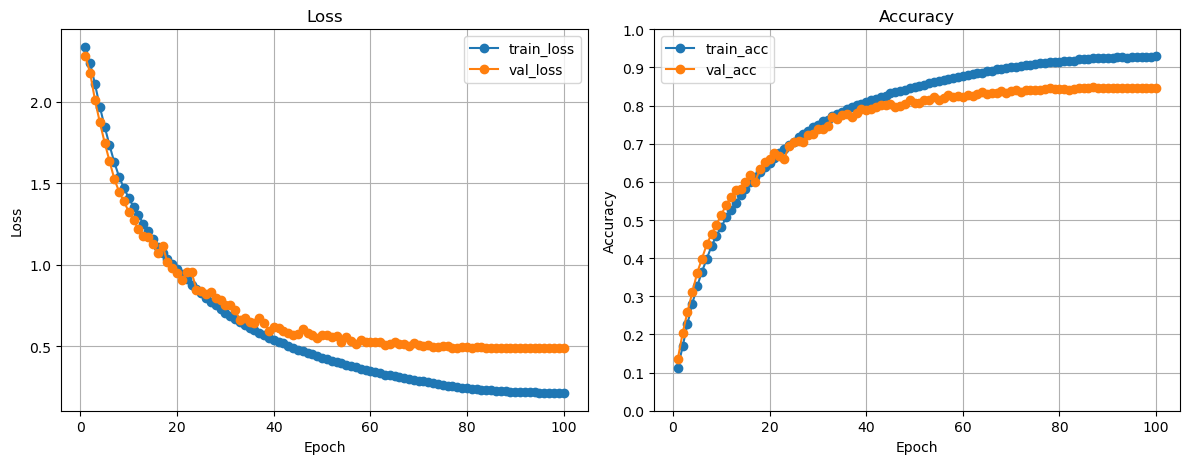

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.4_weight_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['layer4.'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 0.4, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_weight_gaussian_0.01_20250524_002930/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.8283
  Final Val Accuracy:   0.7470



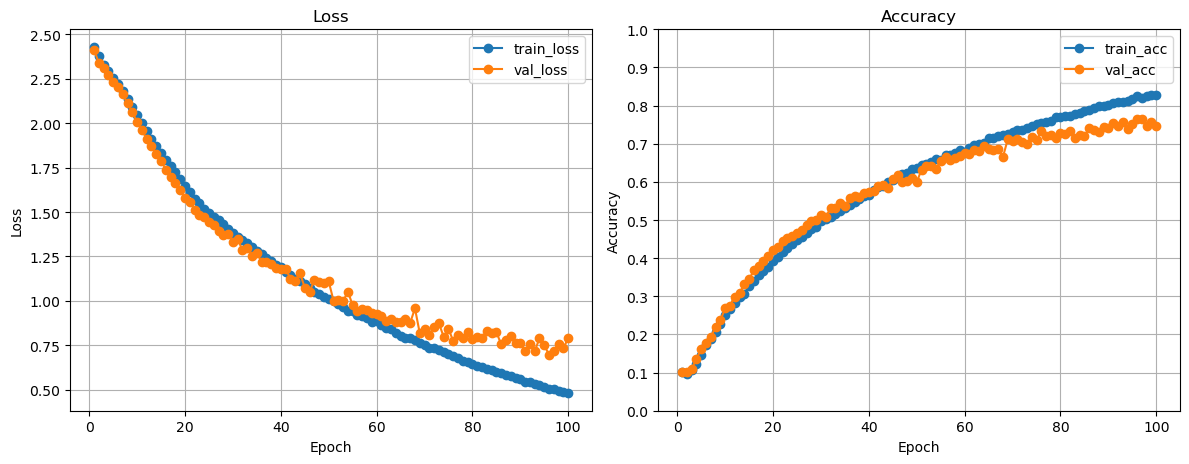

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_baseline.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layer': None, 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.999, 'subset': 1.0, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_none_20250524_165233/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.9989
  Final Val Accuracy:   0.9206



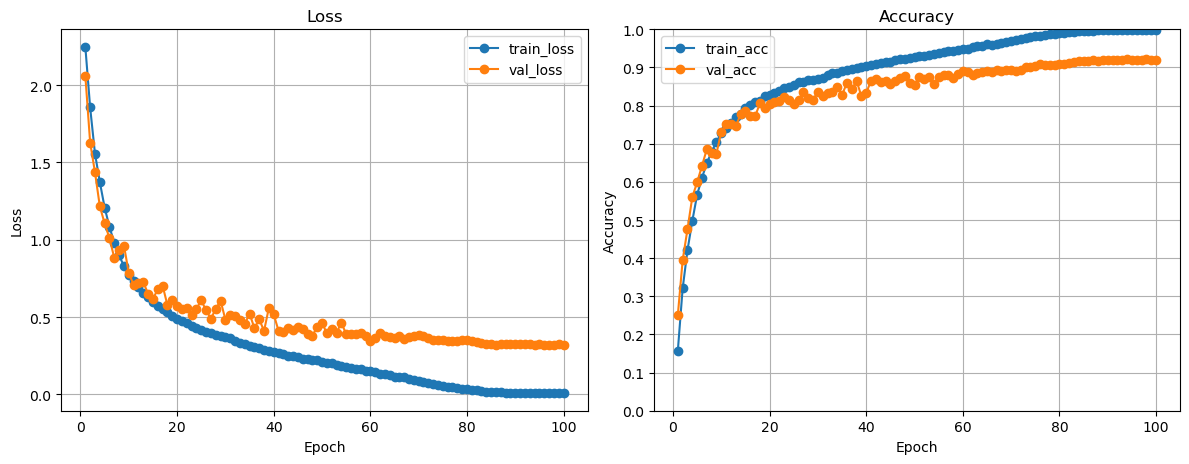

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_gradient_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['conv1'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 1.0, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_gradient_gaussian_0.01_20250524_135440/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9257
  Final Val Accuracy:   0.8548



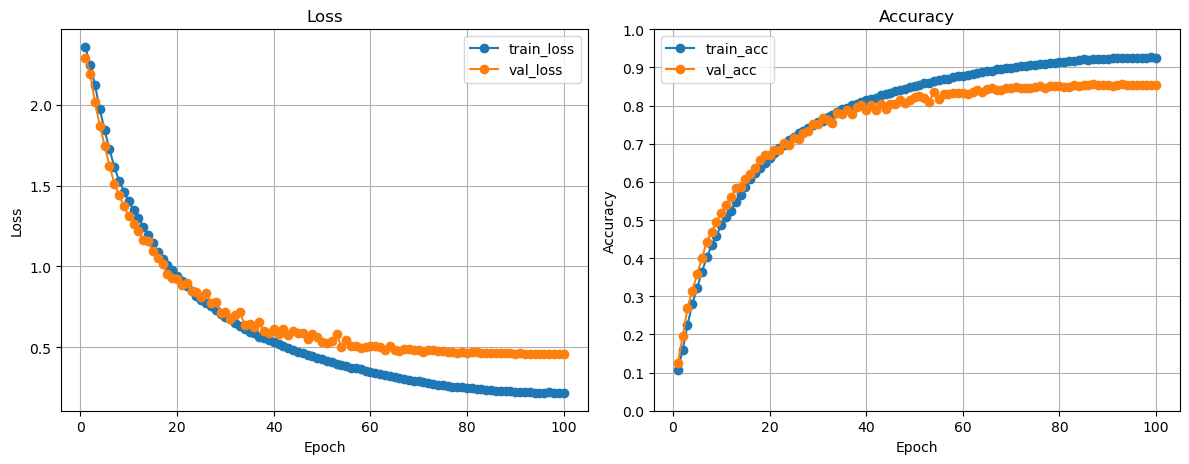

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.4_baseline.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layer': None, 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 0.4, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_none_20250524_002249/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.8647
  Final Val Accuracy:   0.7578



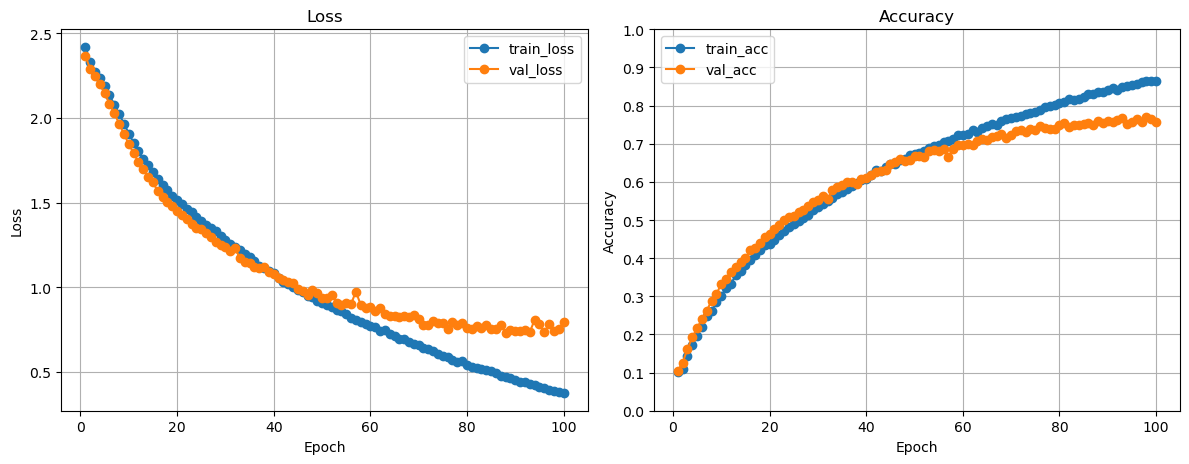

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.4_baseline.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'none', 'noise_magnitude': 0.01, 'noise_schedule': 'constant', 'noise_layer': None, 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 0.4, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_none_20250524_125145/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.8632
  Final Val Accuracy:   0.7592



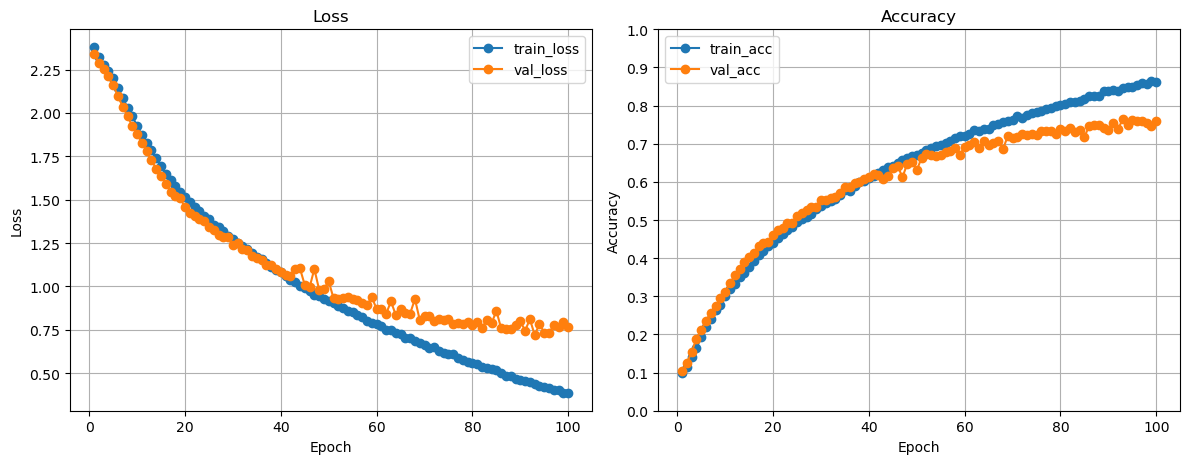

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_0.4_weight_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'weight', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['layer4.'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.999, 'subset': 0.4, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_weight_gaussian_0.01_20250524_143828/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9514
  Final Val Accuracy:   0.8190



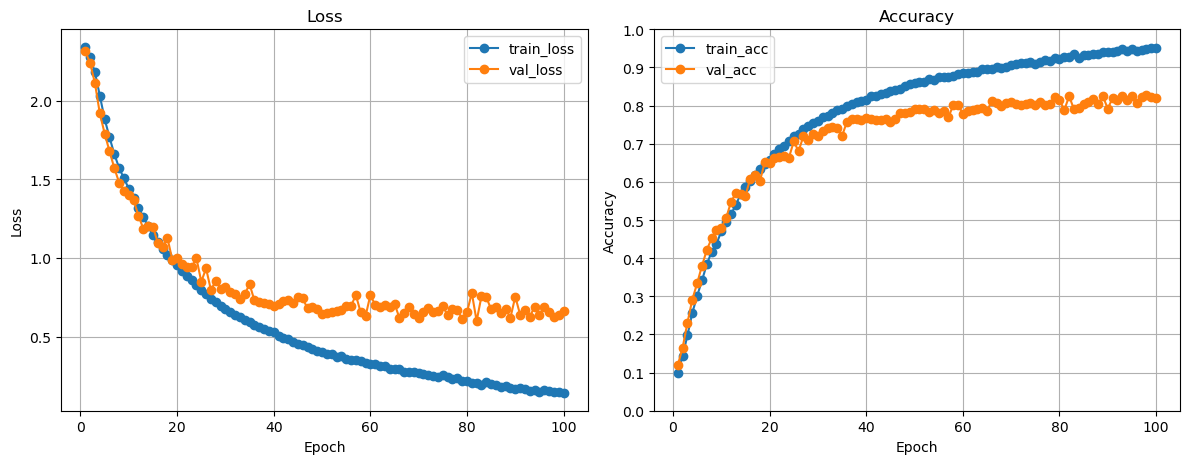

{'data_dir': './data/cifar10', 'checkpoint_name': 'resnet18_1.0_gradient_0.01_exponential.pth', 'download_weights': 0, 'classifier': 'resnet18', 'model': None, 'batch_size': 128, 'max_epochs': 100, 'num_workers': 4, 'gpu_id': '0', 'learning_rate': 0.01, 'weight_decay': 0.001, 'noise_type': 'gradient', 'noise_magnitude': 0.01, 'noise_schedule': 'exponential', 'noise_layer': ['layer4.'], 'noise_distribution': 'gaussian', 'optimizer': 'sgd', 'momentum': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'subset': 1.0, 'test_phase': False}
File: all_experiments/momentumTest/metrics/resnet18_gradient_gaussian_0.01_20250524_133548/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9216
  Final Val Accuracy:   0.8503



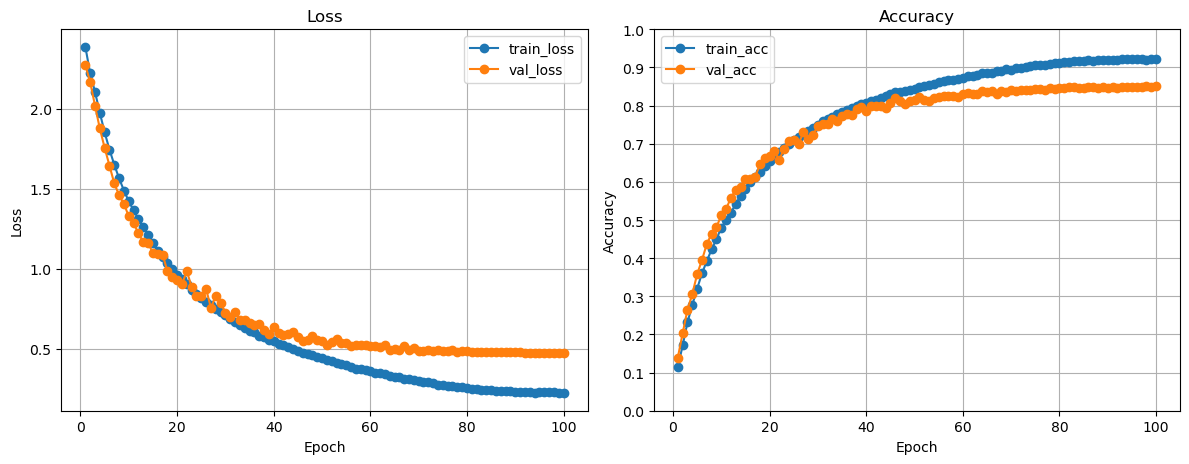

In [9]:
log_dir = "all_experiments/momentumTest"
plot_all_json(get_all_json(log_dir))